#Mount Google Drive

In [40]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load and Combine the CSV Files

In [41]:
import pandas as pd

# Define the path to the datas directory in your Google Drive
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Load the original CSV files
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'

original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)

# Load the converted CSV files
converted_normal_data_path = f'{data_dir}normal_samples_converted.csv'
converted_abnormal_data_path = f'{data_dir}abnormal_samples_converted.csv'

converted_normal_data = pd.read_csv(converted_normal_data_path, header=None)
converted_abnormal_data = pd.read_csv(converted_abnormal_data_path, header=None)

# Display the first few rows of the original and converted data
print("Original Normal Data (first 5 rows):\n", original_normal_data.head())
print("Converted Normal Data (first 5 rows):\n", converted_normal_data.head())
print("Original Abnormal Data (first 5 rows):\n", original_abnormal_data.head())
print("Converted Abnormal Data (first 5 rows):\n", converted_abnormal_data.head())


Original Normal Data (first 5 rows):
         0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1 

#Normalize the Data and Plot ECG Samples

Features (first 5 rows):
 [[0.93223286 0.86967856 0.88618594 0.92962641 0.90877497 0.93397045
  0.80104256 0.7497828  0.6872285  0.63509989 0.64986968 0.63509989
  0.65508252 0.66463947 0.63336229 0.74630755 0.87141615 0.9383145
  1.         0.94874024 0.39617723 0.         0.03909644 0.12858383
  0.30582103 0.64031279 0.6177237  0.53779322 0.35273674 0.22067767
  0.25629887 0.35794961 0.48218939 0.57080799 0.57775849 0.62033015
  0.62206775 0.6185925  0.6264118  0.61251086 0.62206775 0.59774107
  0.6185925  0.63075584 0.62293661 0.62814945 0.60642922 0.64465684
  0.67158991 0.62293661 0.67332757 0.66985232 0.6872285  0.72458732
  0.71850562 0.7506516  0.72806257 0.73935705 0.74804521 0.7437011
  0.78887922 0.73935705 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        

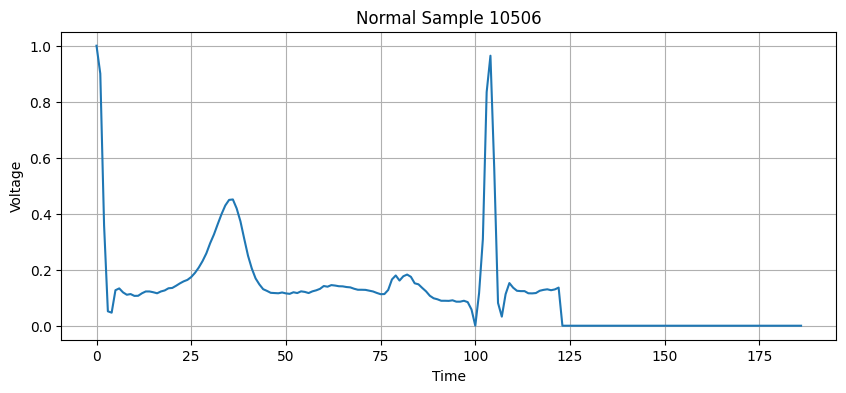

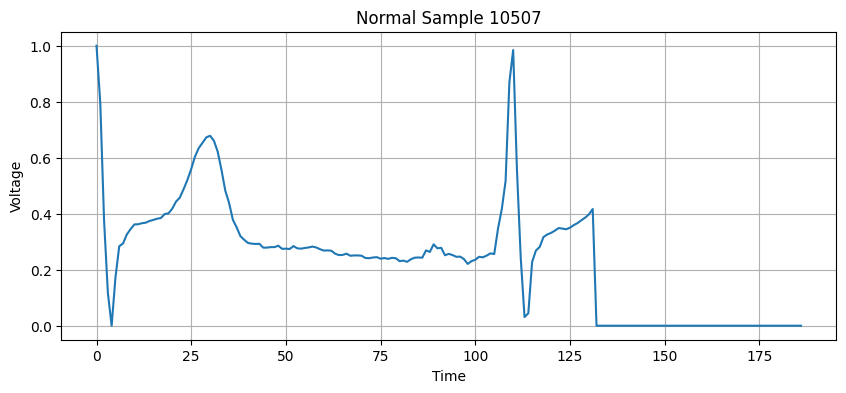

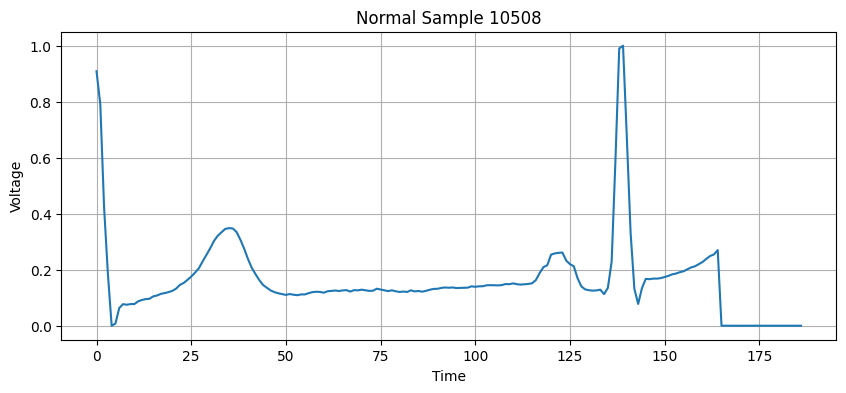

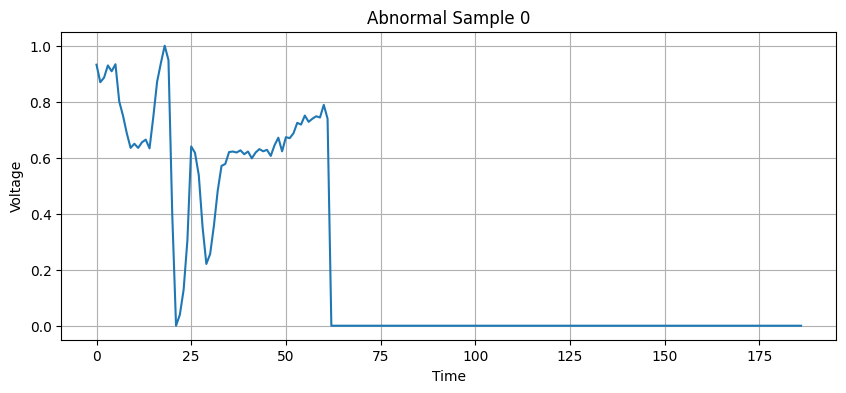

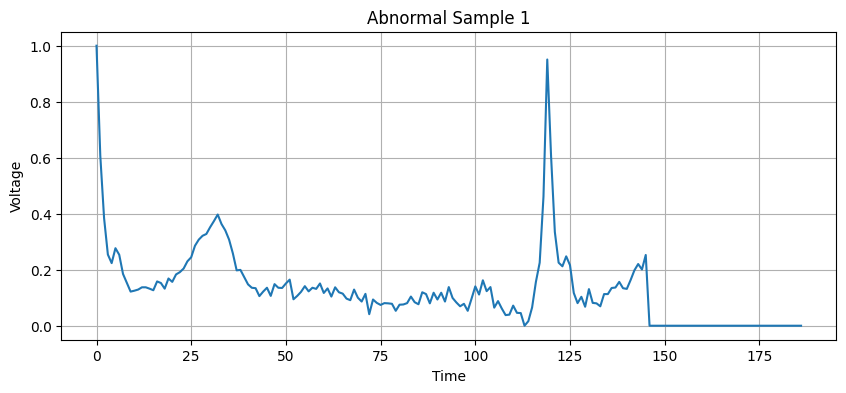

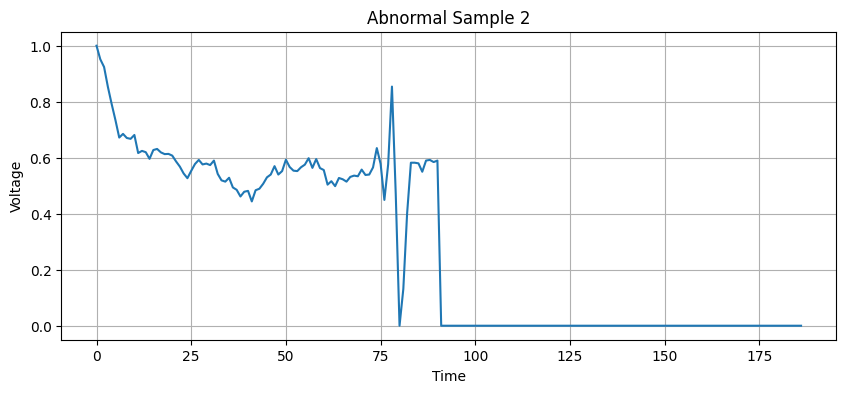

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import cv2

# Define the path to the combined data CSV file
combined_data_path = '/content/drive/MyDrive/ECG/datas/combined_data.csv'  # Ensure this path is correct

# Load the combined data
data = pd.read_csv(combined_data_path, header=None)

# Features and labels
X = data.iloc[:, :-1].values  # Convert to numpy array
y = data.iloc[:, -1].values   # Convert to numpy array

# Display the first few rows of features and labels
print("Features (first 5 rows):\n", X[:5])
print("Labels (first 5 rows):\n", y[:5])

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Display the first few rows of normalized features
print("Normalized Features (first 5 rows):\n", X_normalized[:5])

# Create the directory to save images if it does not exist
image_dir = '/content/drive/MyDrive/ECG/images/'
os.makedirs(image_dir, exist_ok=True)

# Function to save ECG data as image
def save_ecg_as_image(data, idx, label, image_dir):
    # Scale data to 0-255
    scaled_data = ((data[idx] - np.min(data[idx])) / (np.max(data[idx]) - np.min(data[idx])) * 255).astype(np.uint8)
    # Ensure the data is reshaped to 2D (e.g., 1D array to (length, 1))
    scaled_data = scaled_data.reshape(-1, 1)
    # Save as grayscale image
    image_path = os.path.join(image_dir, f'{label}_sample_{idx}.png')
    cv2.imwrite(image_path, scaled_data)
    return image_path

# Sample indices for normal and abnormal data
normal_indices = [i for i, label in enumerate(y) if label == 0][:3]
abnormal_indices = [i for i, label in enumerate(y) if label == 1][:3]

# Save individual normal samples as images
normal_image_paths = [save_ecg_as_image(X_normalized, idx, 'normal', image_dir) for idx in normal_indices]

# Save individual abnormal samples as images
abnormal_image_paths = [save_ecg_as_image(X_normalized, idx, 'abnormal', image_dir) for idx in abnormal_indices]

# Display the paths of saved images
print("Normal image paths:\n", normal_image_paths)
print("Abnormal image paths:\n", abnormal_image_paths)

# Plot sample normal ECG data
for idx in normal_indices:
    plt.figure(figsize=(10, 4))
    plt.plot(X[idx])
    plt.title(f'Normal Sample {idx}')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.show()

# Plot sample abnormal ECG data
for idx in abnormal_indices:
    plt.figure(figsize=(10, 4))
    plt.plot(X[idx])
    plt.title(f'Abnormal Sample {idx}')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.show()


#Convert the Images Back to CSV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checking file paths:
/content/drive/MyDrive/ECG/datas/ptbdb_normal.csv True
/content/drive/MyDrive/ECG/datas/ptbdb_abnormal.csv True
/content/drive/MyDrive/ECG/datas/normal_samples_converted.csv True
/content/drive/MyDrive/ECG/datas/abnormal_samples_converted.csv True
       Type  Sample      SSIM       MSE
0    Normal       0  0.525317  0.140626
1    Normal       1  0.409392  0.367904
2    Normal       2  0.287171  0.596986
3  Abnormal       0  0.313900  0.503847
4  Abnormal       1  0.163196  0.799281
5  Abnormal       2  0.249910  0.431177


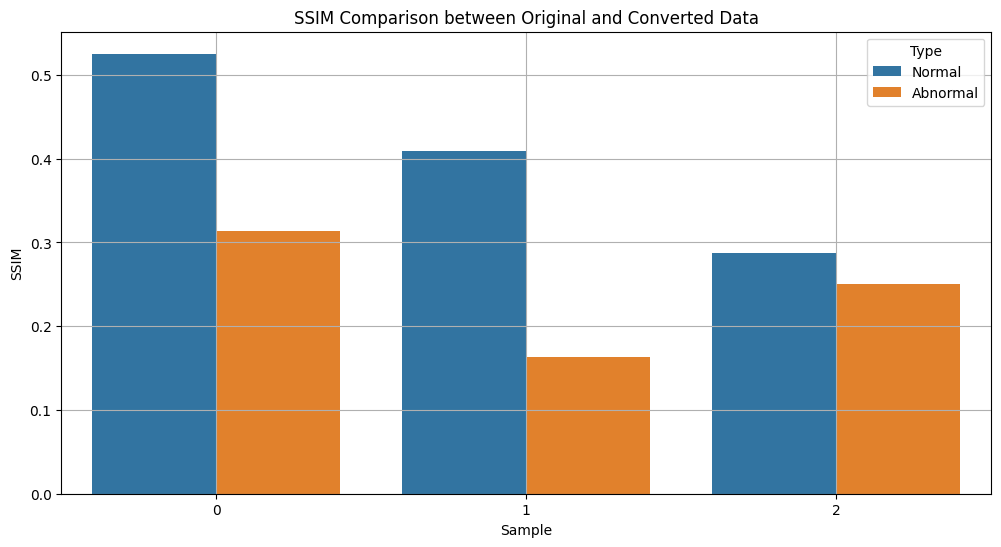

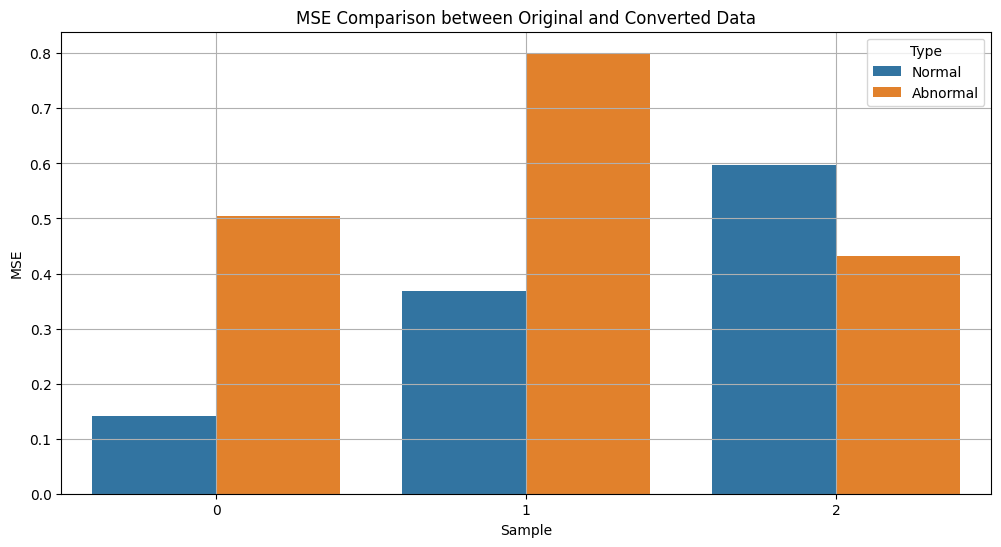

Columns in original_normal_data_smoothed: RangeIndex(start=0, stop=188, step=1)
Columns in converted_normal_data_smoothed: RangeIndex(start=0, stop=188, step=1)


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
import os
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the data directory in your Google Drive
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Load CSV files from the specified directory
original_normal_data_path = os.path.join(data_dir, 'ptbdb_normal.csv')
original_abnormal_data_path = os.path.join(data_dir, 'ptbdb_abnormal.csv')
converted_normal_data_path = os.path.join(data_dir, 'normal_samples_converted.csv')
converted_abnormal_data_path = os.path.join(data_dir, 'abnormal_samples_converted.csv')

# Check if the files exist
print("Checking file paths:")
print(original_normal_data_path, os.path.exists(original_normal_data_path))
print(original_abnormal_data_path, os.path.exists(original_abnormal_data_path))
print(converted_normal_data_path, os.path.exists(converted_normal_data_path))
print(converted_abnormal_data_path, os.path.exists(converted_abnormal_data_path))

# Load the CSV files
original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)
converted_normal_data = pd.read_csv(converted_normal_data_path, header=None)
converted_abnormal_data = pd.read_csv(converted_abnormal_data_path, header=None)

# Adjust columns to 188
def adjust_columns(df, target_columns=188):
    if df.shape[1] > target_columns:
        return df.iloc[:, :target_columns]
    elif df.shape[1] < target_columns:
        padding = pd.DataFrame(np.zeros((df.shape[0], target_columns - df.shape[1])))
        return pd.concat([df, padding], axis=1)
    else:
        return df

original_normal_data = adjust_columns(original_normal_data)
original_abnormal_data = adjust_columns(original_abnormal_data)
converted_normal_data = adjust_columns(converted_normal_data)
converted_abnormal_data = adjust_columns(converted_abnormal_data)

# Apply smoothing
def apply_smoothing(data):
    return savgol_filter(data, window_length=11, polyorder=3)

original_normal_data_smoothed = original_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
original_abnormal_data_smoothed = original_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_normal_data_smoothed = converted_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_abnormal_data_smoothed = converted_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')

# Normalize the data
scaler = StandardScaler()
original_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_normal_data_smoothed))
original_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_abnormal_data_smoothed))
converted_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_normal_data_smoothed))
converted_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_abnormal_data_smoothed))

# Ensure the plots directory exists
os.makedirs('plots', exist_ok=True)

# Function to save plots as high-resolution images
def save_plot_as_image(data, title, file_path, dpi=300):
    plt.figure(figsize=(15, 5))
    plt.plot(data, linestyle=':', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.savefig(file_path, dpi=dpi)
    plt.close()

# Save images for all samples in the original and converted data with higher resolution
for i in range(min(len(original_normal_data_smoothed), len(converted_normal_data_smoothed))):
    save_plot_as_image(original_normal_data_smoothed.iloc[i], f'Original Normal Sample {i}', f'plots/original_normal_sample_{i}.png')
    save_plot_as_image(converted_normal_data_smoothed.iloc[i], f'Converted Normal Sample {i}', f'plots/converted_normal_sample_{i}.png')

for i in range(min(len(original_abnormal_data_smoothed), len(converted_abnormal_data_smoothed))):
    save_plot_as_image(original_abnormal_data_smoothed.iloc[i], f'Original Abnormal Sample {i}', f'plots/original_abnormal_sample_{i}.png')
    save_plot_as_image(converted_abnormal_data_smoothed.iloc[i], f'Converted Abnormal Sample {i}', f'plots/converted_abnormal_sample_{i}.png')

# Function to compute Mean Squared Error (MSE)
def mse(dataA, dataB):
    err = np.sum((dataA - dataB) ** 2)
    err /= float(dataA.shape[0])
    return err

# Align and compare data for all samples using linear interpolation
def align_and_compare(data1, data2):
    min_len = min(len(data1), len(data2))
    data1_interp = np.interp(np.linspace(0, len(data1), min_len), np.arange(len(data1)), data1)
    data2_interp = np.interp(np.linspace(0, len(data2), min_len), np.arange(len(data2)), data2)
    return data1_interp, data2_interp

# Align and compare data for all samples
results = []

for i in range(min(len(original_normal_data_smoothed), len(converted_normal_data_smoothed))):
    original_normal_aligned, converted_normal_aligned = align_and_compare(original_normal_data_smoothed.iloc[i], converted_normal_data_smoothed.iloc[i])
    ssim_score = ssim(original_normal_aligned, converted_normal_aligned)
    mse_score = mse(original_normal_aligned, converted_normal_aligned)
    results.append(('Normal', i, ssim_score, mse_score))

for i in range(min(len(original_abnormal_data_smoothed), len(converted_abnormal_data_smoothed))):
    original_abnormal_aligned, converted_abnormal_aligned = align_and_compare(original_abnormal_data_smoothed.iloc[i], converted_abnormal_data_smoothed.iloc[i])
    ssim_score = ssim(original_abnormal_aligned, converted_abnormal_aligned)
    mse_score = mse(original_abnormal_aligned, converted_abnormal_aligned)
    results.append(('Abnormal', i, ssim_score, mse_score))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Type', 'Sample', 'SSIM', 'MSE'])

# Display the results
print(results_df)

# Plot SSIM for Normal and Abnormal samples separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='SSIM', hue='Type', data=results_df)
plt.title('SSIM Comparison between Original and Converted Data')
plt.ylabel('SSIM')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.savefig('plots/ssim_comparison.png', dpi=300)
plt.show()

# Plot MSE for Normal and Abnormal samples separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='MSE', hue='Type', data=results_df)
plt.title('MSE Comparison between Original and Converted Data')
plt.ylabel('MSE')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.savefig('plots/mse_comparison.png', dpi=300)
plt.show()

# Check the columns in your DataFrame
print("Columns in original_normal_data_smoothed:", original_normal_data_smoothed.columns)
print("Columns in converted_normal_data_smoothed:", converted_normal_data_smoothed.columns)


#Load the original and converted csv Files and stablize the in/out row/colums and save it

> Add blockquote



In [44]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter

# Define the path to the data directory
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Paths to the original and converted CSV files
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'
converted_normal_data_path = f'{data_dir}normal_samples_converted.csv'
converted_abnormal_data_path = f'{data_dir}abnormal_samples_converted.csv'

# Load the CSV files
original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)
converted_normal_data = pd.read_csv(converted_normal_data_path, header=None)
converted_abnormal_data = pd.read_csv(converted_abnormal_data_path, header=None)

# Function to adjust the number of columns to a fixed size
def adjust_columns(df, target_columns=188):
    if df.shape[1] > target_columns:
        return df.iloc[:, :target_columns]
    elif df.shape[1] < target_columns:
        # Pad with zeros if fewer columns
        padding = pd.DataFrame(np.zeros((df.shape[0], target_columns - df.shape[1])))
        return pd.concat([df, padding], axis=1)
    else:
        return df

# Adjust the number of columns in each dataframe
original_normal_data = adjust_columns(original_normal_data)
original_abnormal_data = adjust_columns(original_abnormal_data)
converted_normal_data = adjust_columns(converted_normal_data)
converted_abnormal_data = adjust_columns(converted_abnormal_data)

# Function to apply smoothing
def apply_smoothing(data):
    return savgol_filter(data, window_length=11, polyorder=3)

# Apply smoothing to the original and converted data
original_normal_data_smoothed = original_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
original_abnormal_data_smoothed = original_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_normal_data_smoothed = converted_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_abnormal_data_smoothed = converted_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')

# Normalize the data
scaler = StandardScaler()
original_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_normal_data_smoothed))
original_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_abnormal_data_smoothed))
converted_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_normal_data_smoothed))
converted_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_abnormal_data_smoothed))

# Save the adjusted DataFrames back to CSV files
original_normal_data_smoothed.to_csv(f'{data_dir}original_normal_data_smoothed.csv', index=False, header=False)
original_abnormal_data_smoothed.to_csv(f'{data_dir}original_abnormal_data_smoothed.csv', index=False, header=False)
converted_normal_data_smoothed.to_csv(f'{data_dir}converted_normal_data_smoothed.csv', index=False, header=False)
converted_abnormal_data_smoothed.to_csv(f'{data_dir}converted_abnormal_data_smoothed.csv', index=False, header=False)

# Display the first few rows of the adjusted data
print("Adjusted and Saved Original Normal Data (first 5 rows):\n", original_normal_data_smoothed.head())
print("Adjusted and Saved Converted Normal Data (first 5 rows):\n", converted_normal_data_smoothed.head())
print("Adjusted and Saved Original Abnormal Data (first 5 rows):\n", original_abnormal_data_smoothed.head())
print("Adjusted and Saved Converted Abnormal Data (first 5 rows):\n", converted_abnormal_data_smoothed.head())


Adjusted and Saved Original Normal Data (first 5 rows):
         0         1         2         3         4         5         6    \
0  1.240421  0.606696  0.313427  0.116685 -0.099815 -0.372973 -0.707474   
1  0.966455  0.250374  0.048883  0.049800  0.232605  0.639052  0.911557   
2 -0.235242  0.335258  0.401131  0.277191 -0.063593 -0.684328 -1.194494   
3 -1.098791 -1.144133 -1.135364 -1.199519 -1.323652 -1.354339 -0.933517   
4  0.730498  0.335912  0.149337  0.012306 -0.156080 -0.382215 -0.635763   

        7         8         9    ...       178       179       180       181  \
0 -0.540693 -0.449732 -0.517489  ... -0.101424 -0.091982 -0.079831 -0.072152   
1  1.218795  1.477905  1.662082  ... -0.101424 -0.091982 -0.079831 -0.072152   
2 -1.242991 -1.065306 -0.851600  ... -0.101424 -0.091982 -0.079831 -0.072152   
3 -0.911273 -1.107197 -1.170116  ... -0.101424 -0.091982 -0.079831 -0.072152   
4 -0.457599 -0.641545 -0.753738  ... -0.101424 -0.091982 -0.079831 -0.072152   

        182

#Caculate and Visualize errors

       Type  Sample      SSIM       MSE
0    Normal       0  0.525317  0.140626
1    Normal       1  0.409392  0.367904
2    Normal       2  0.287171  0.596986
3  Abnormal       0  0.313900  0.503847
4  Abnormal       1  0.163196  0.799281
5  Abnormal       2  0.249910  0.431177


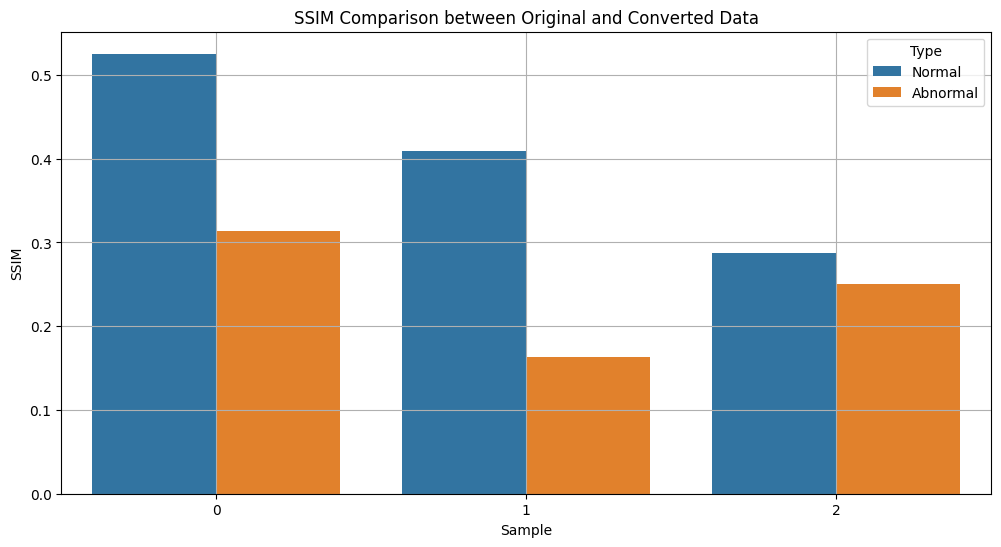

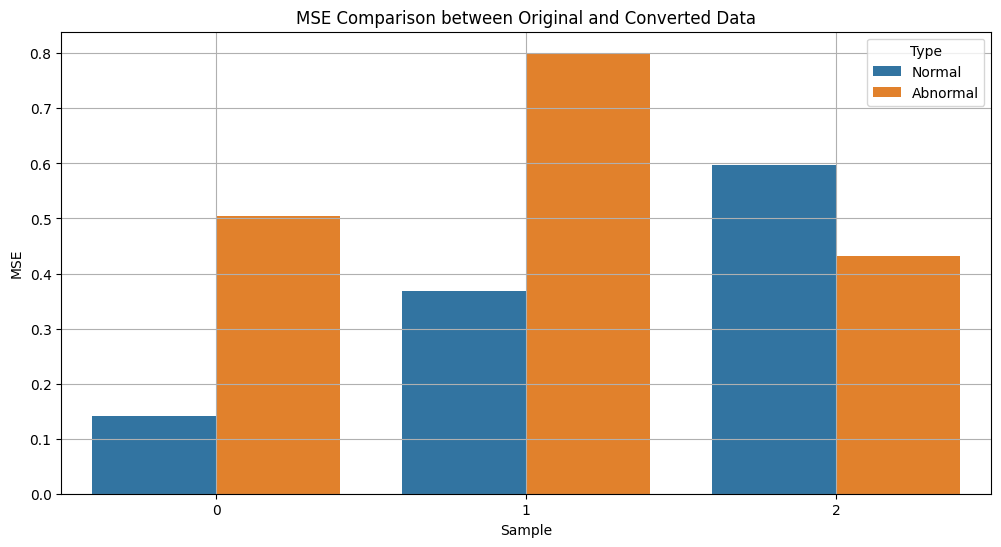

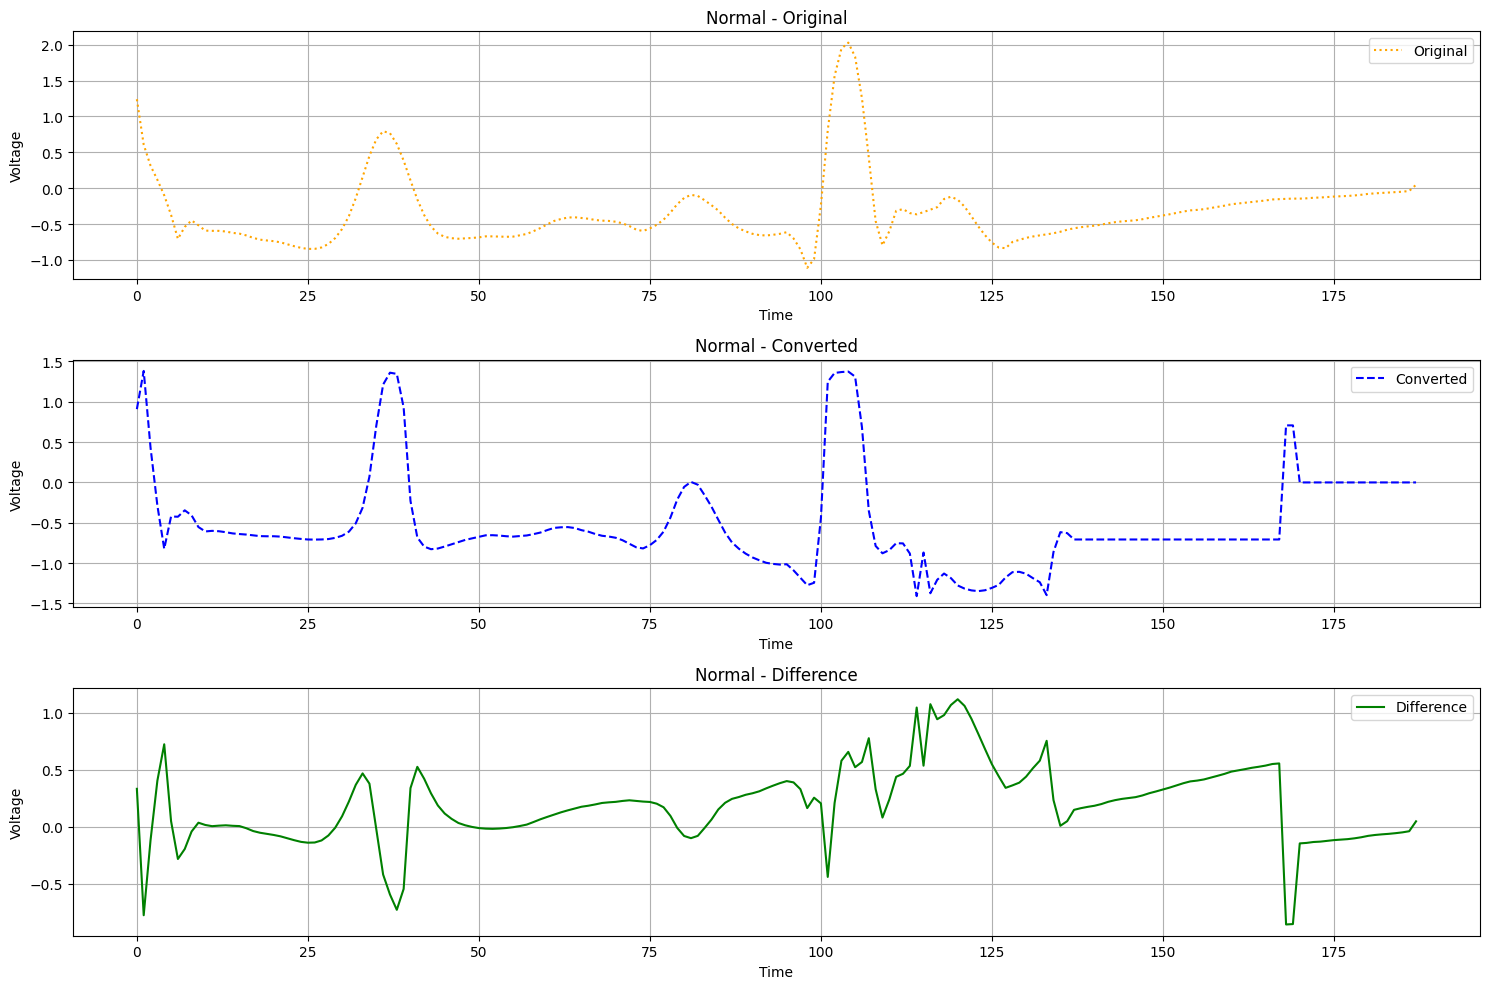

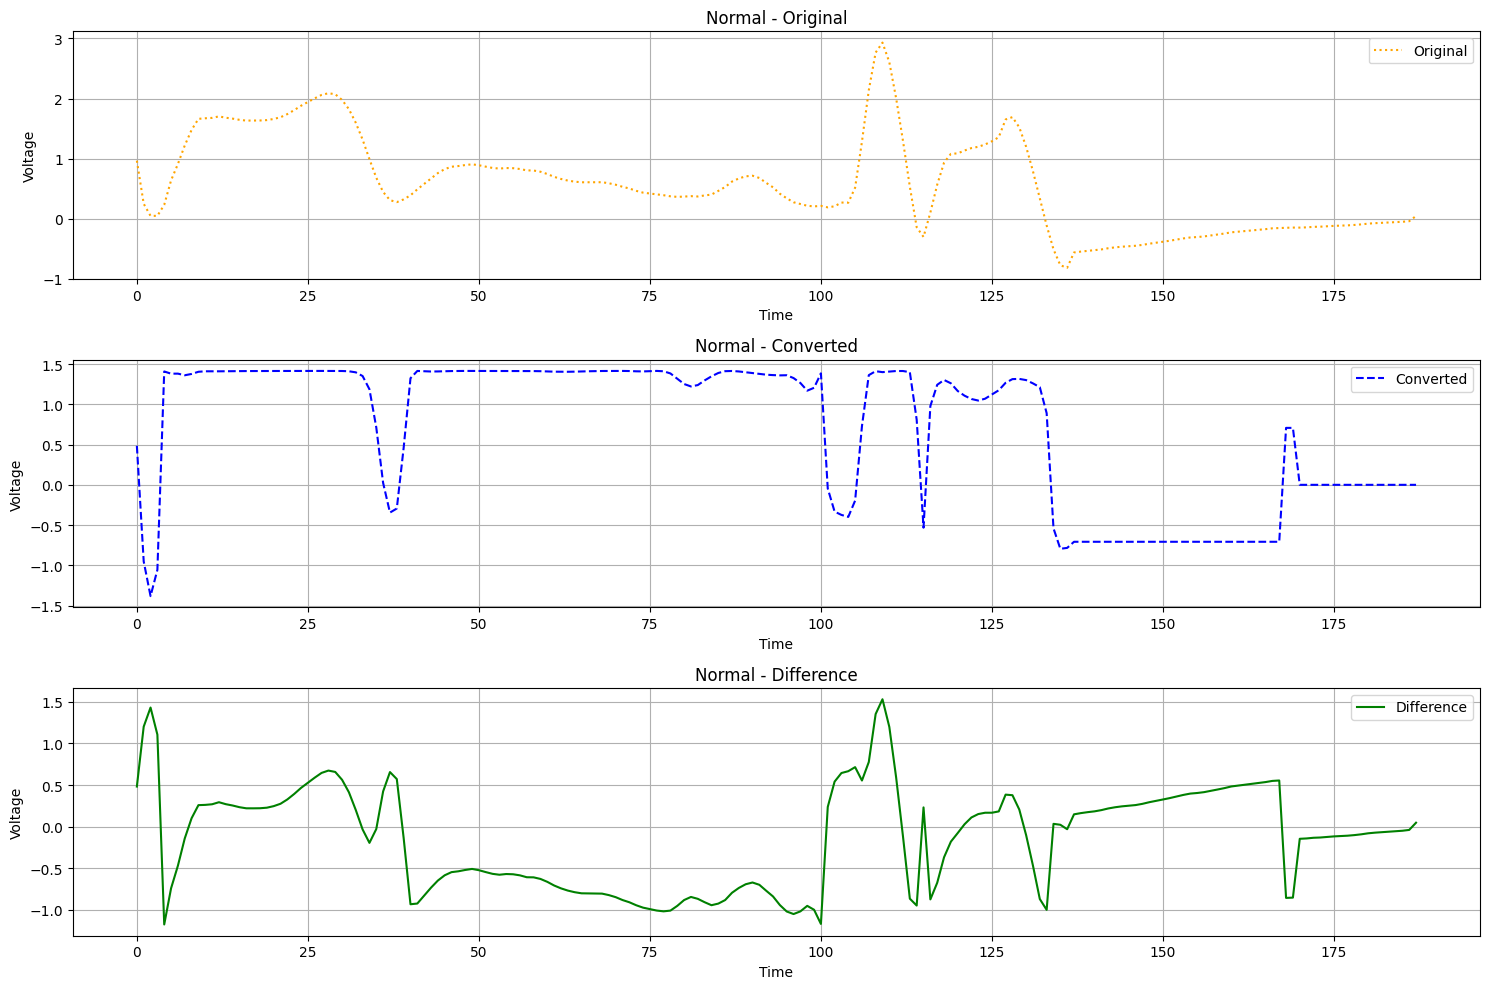

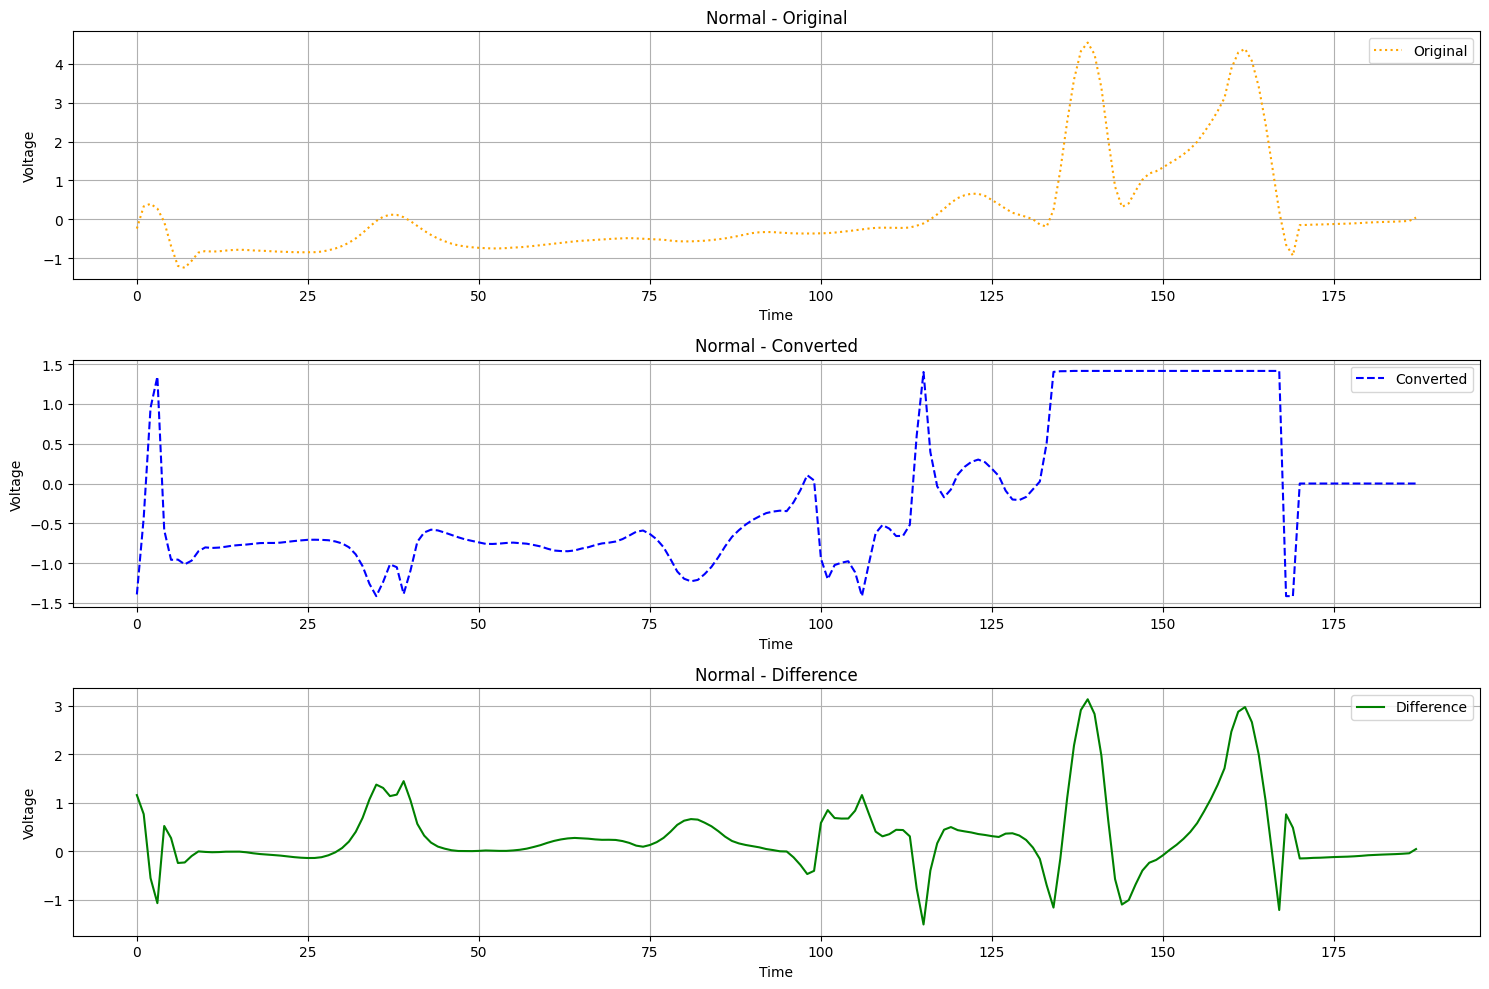

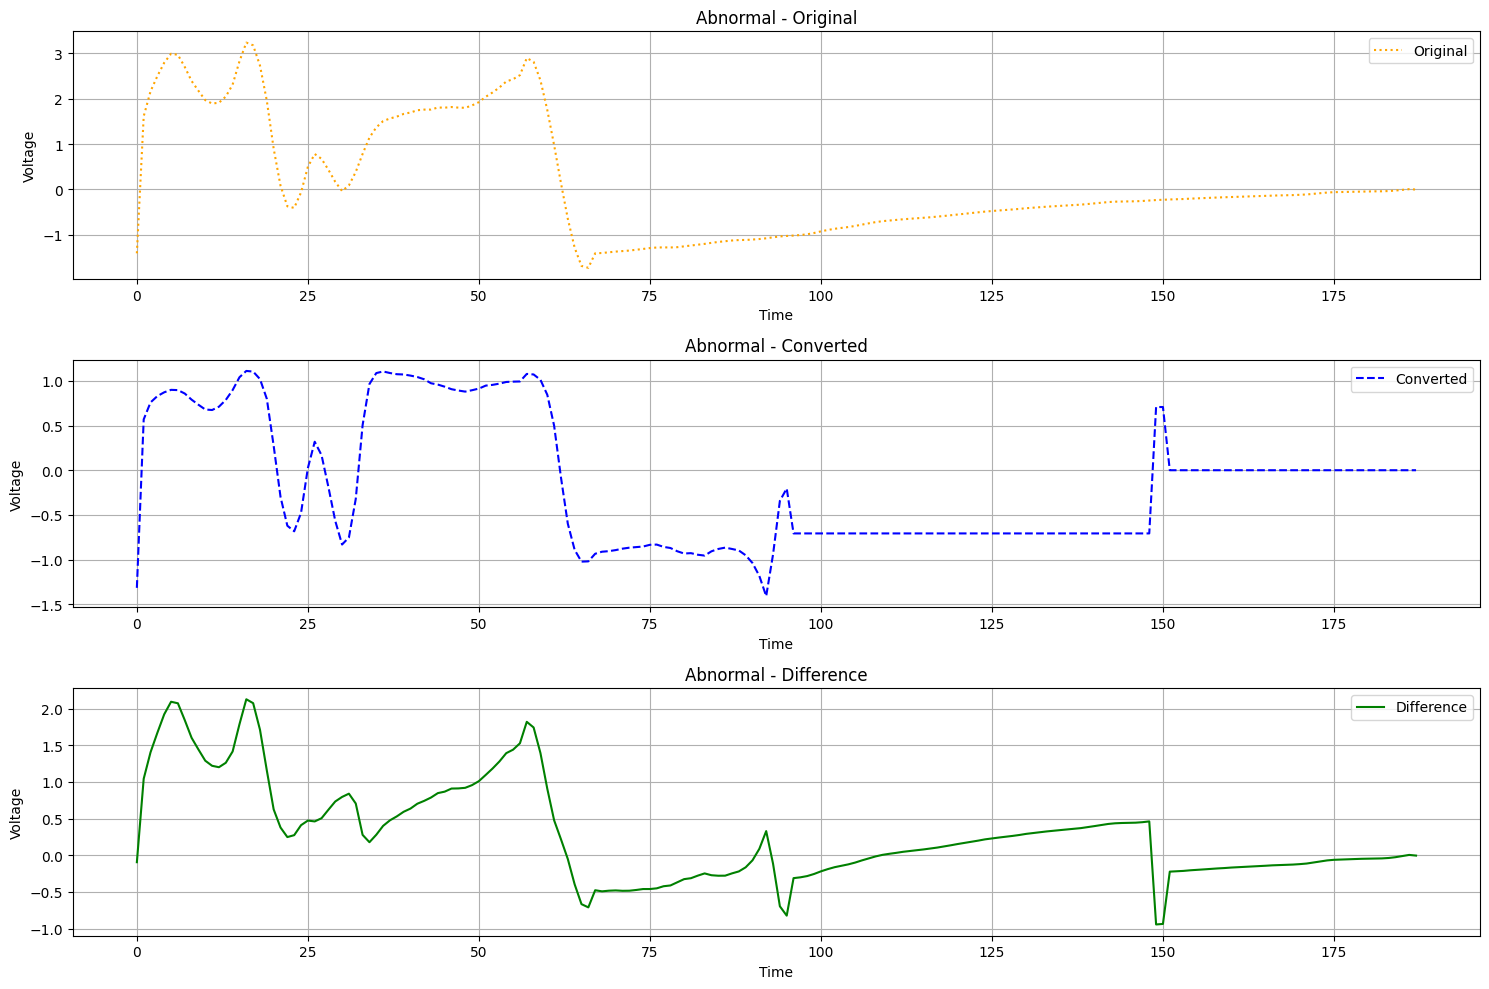

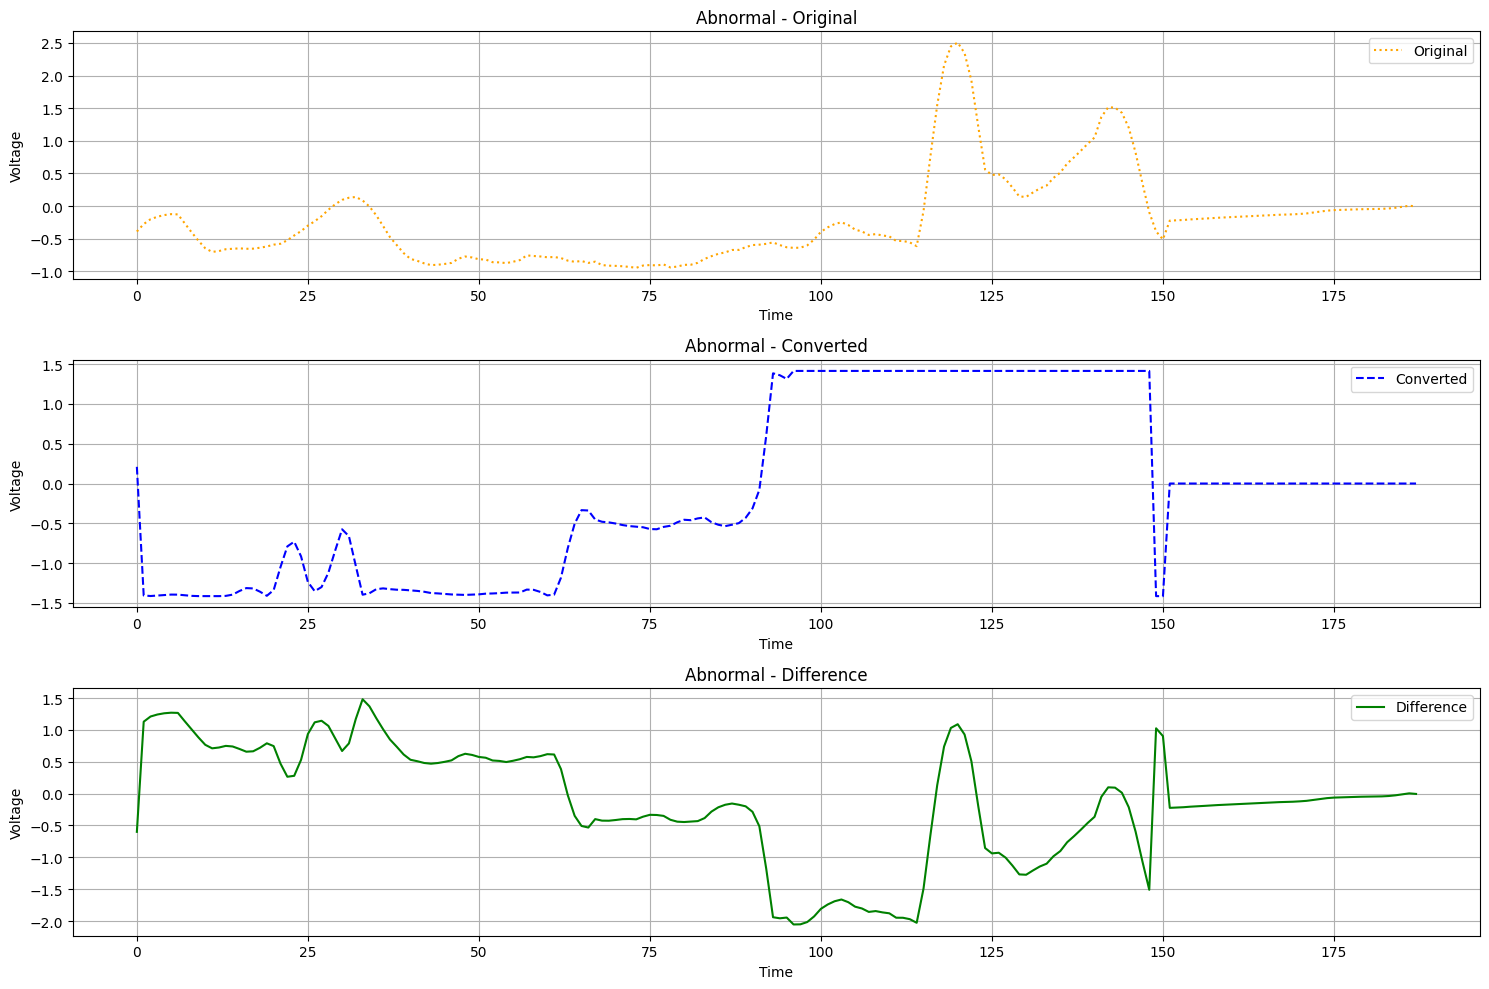

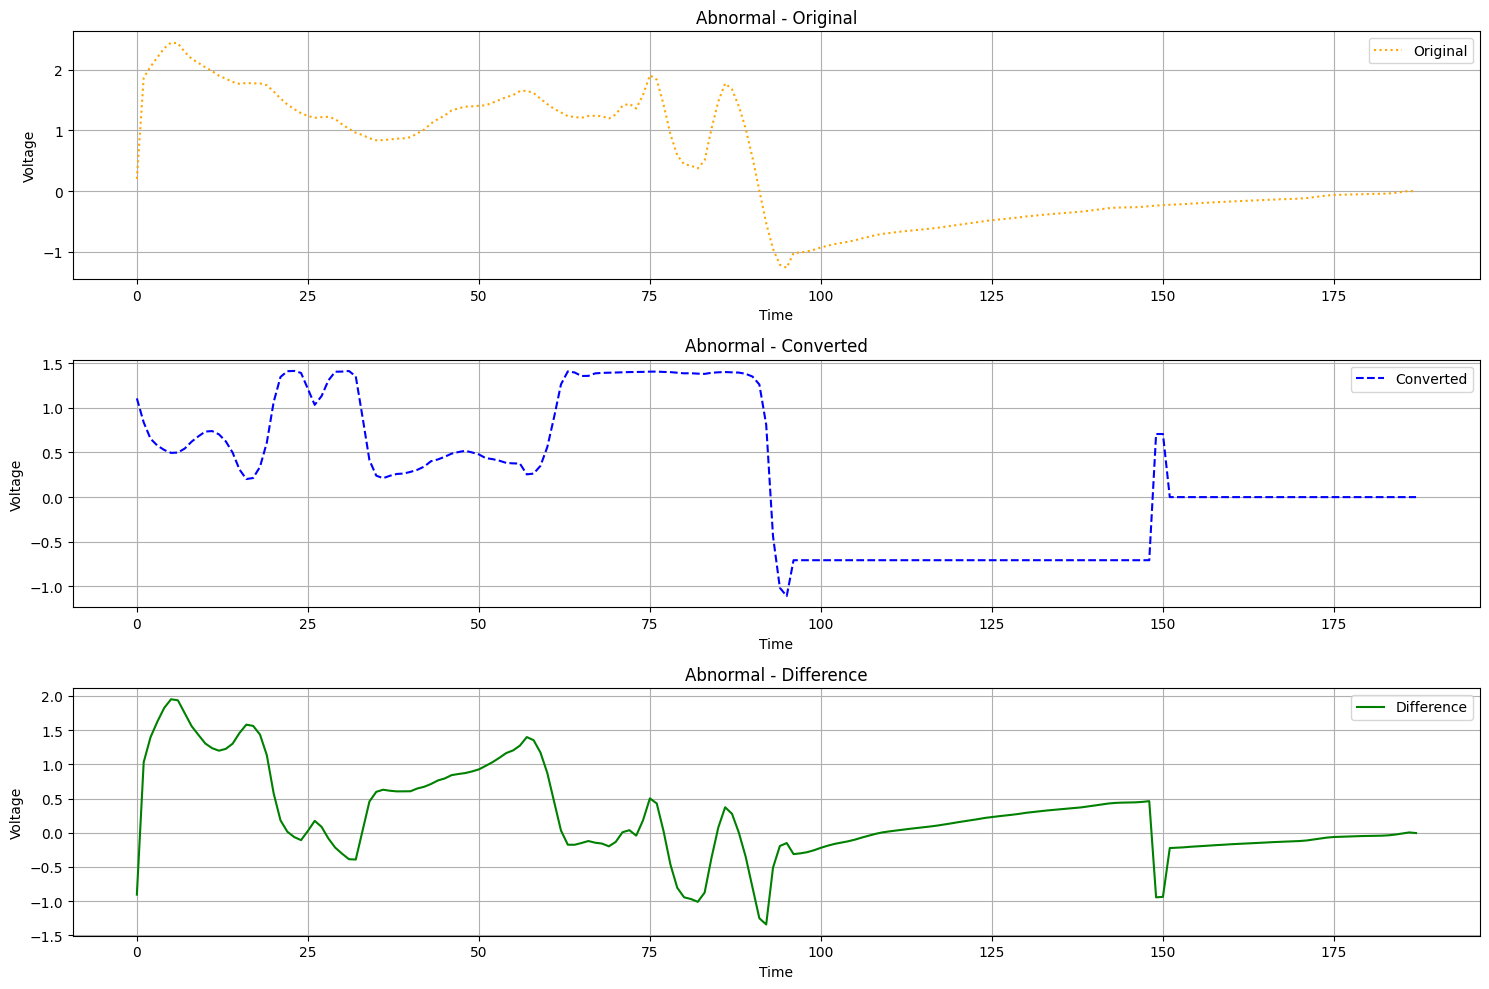

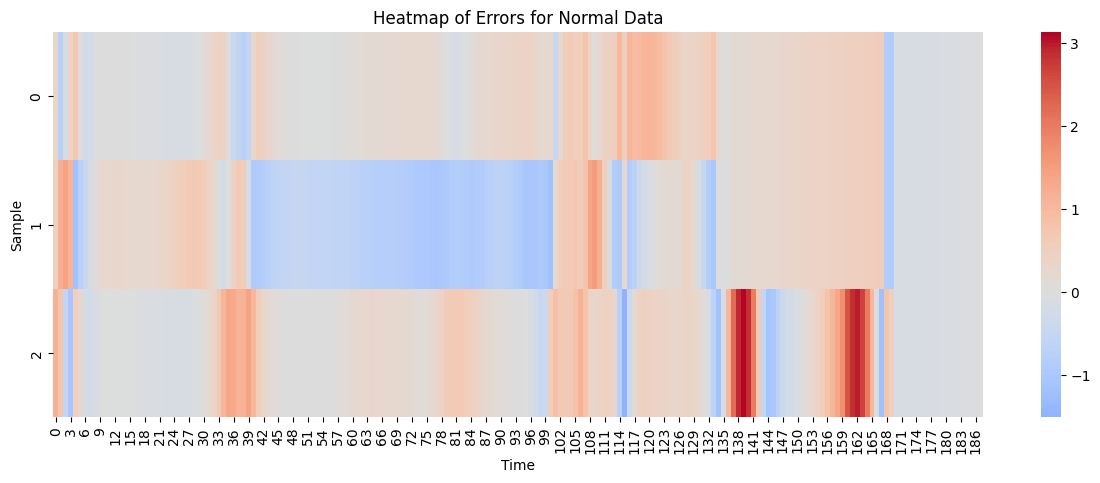

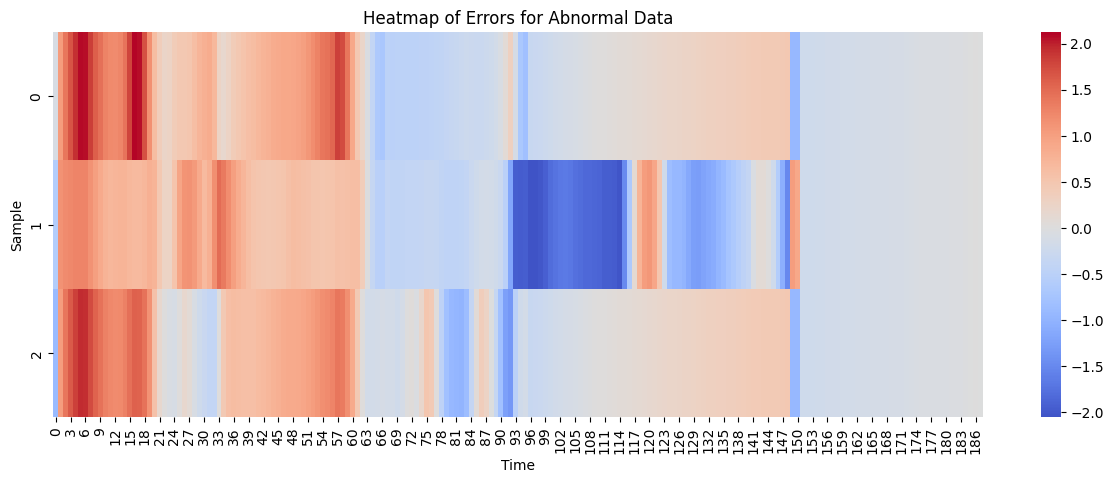

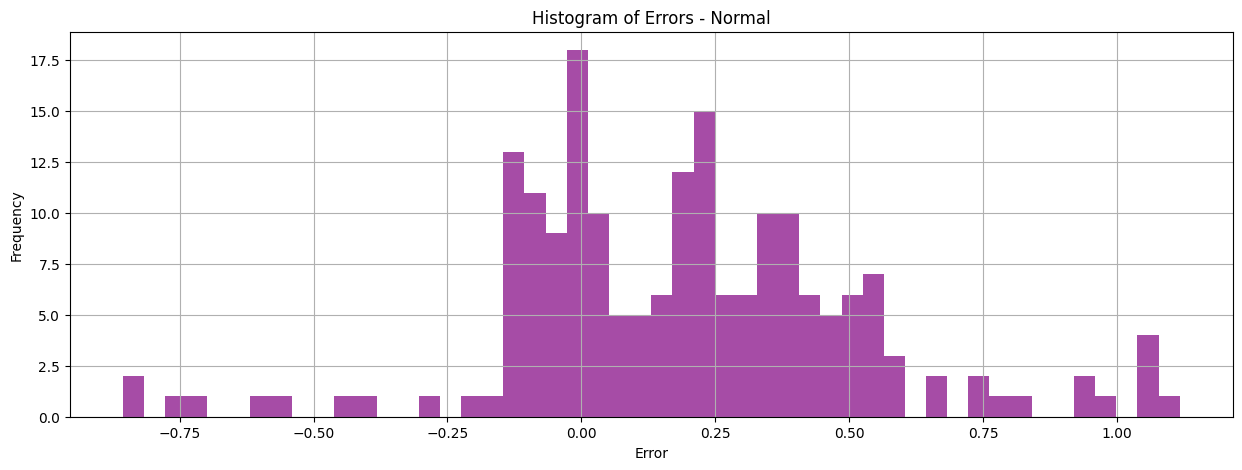

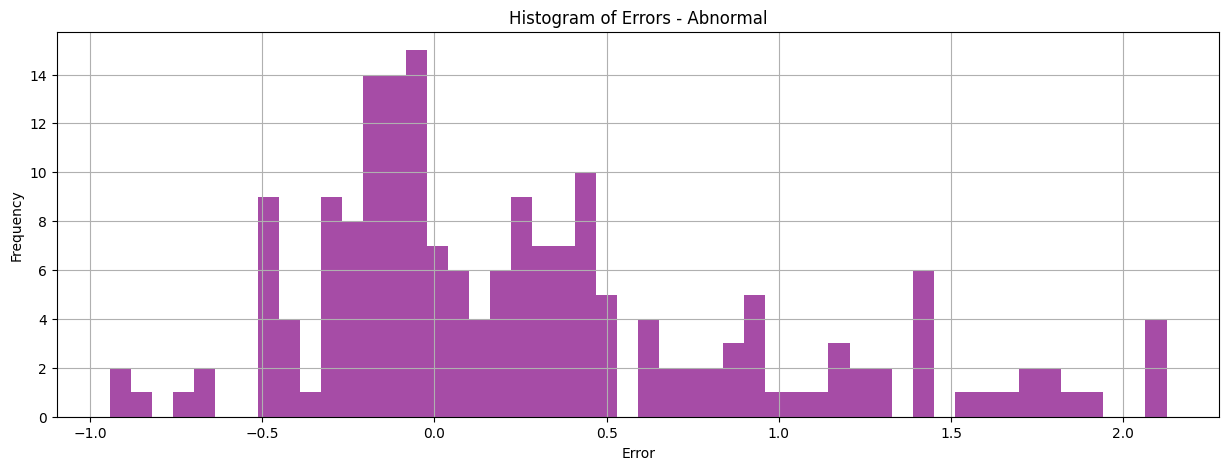

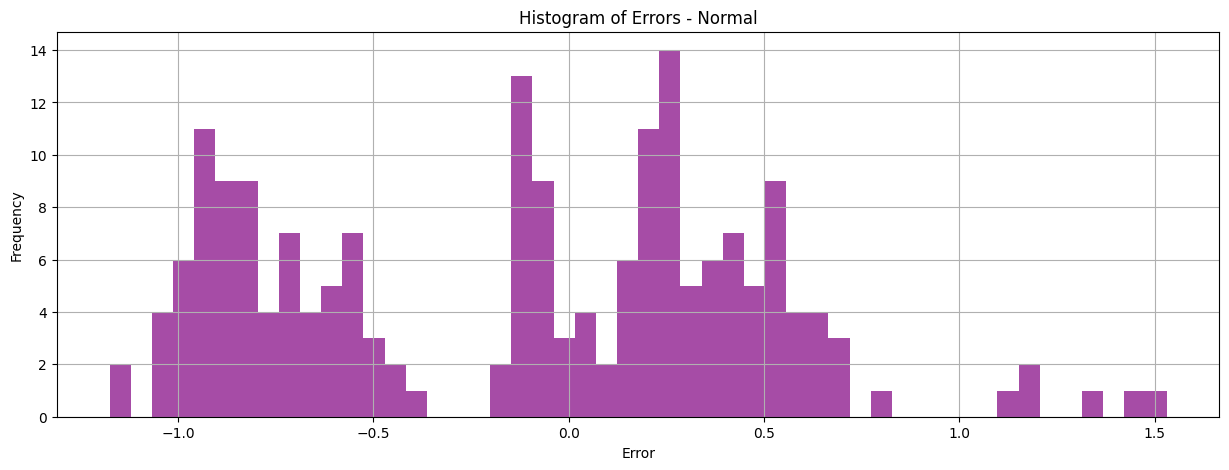

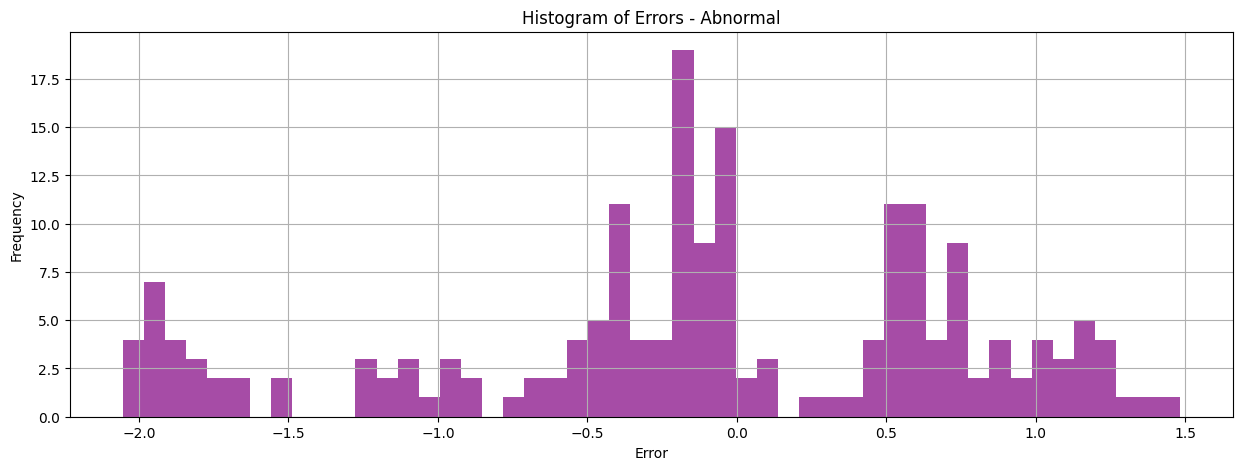

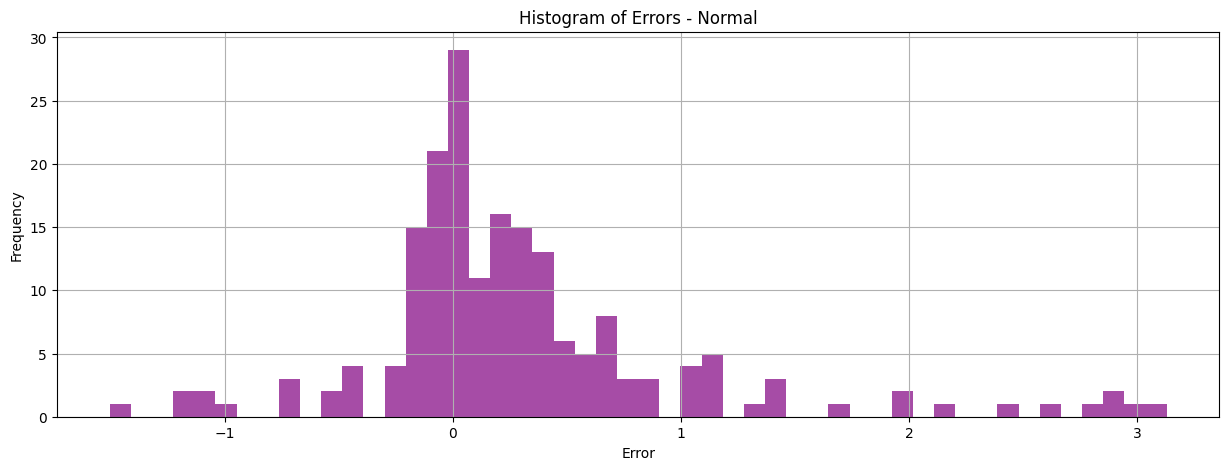

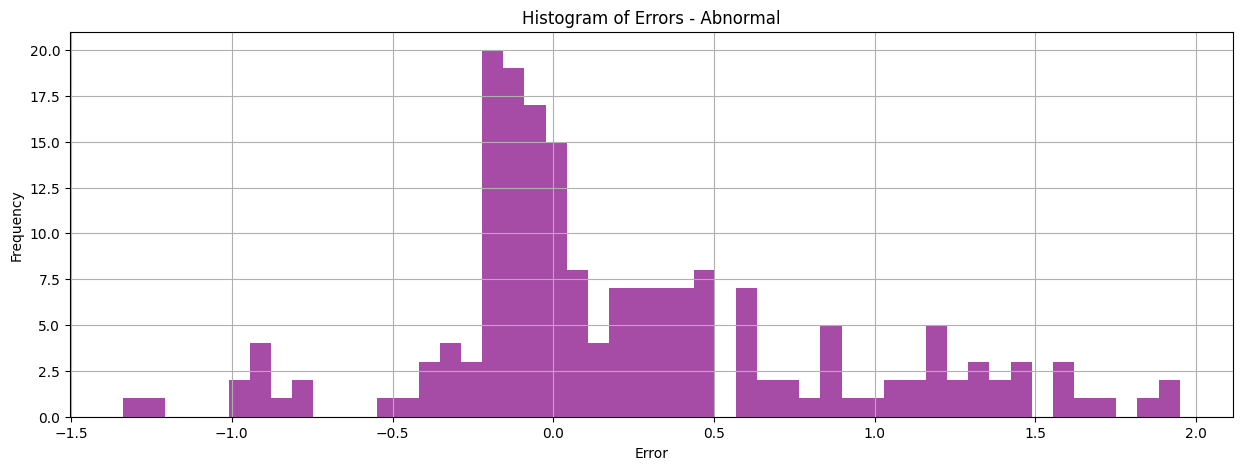

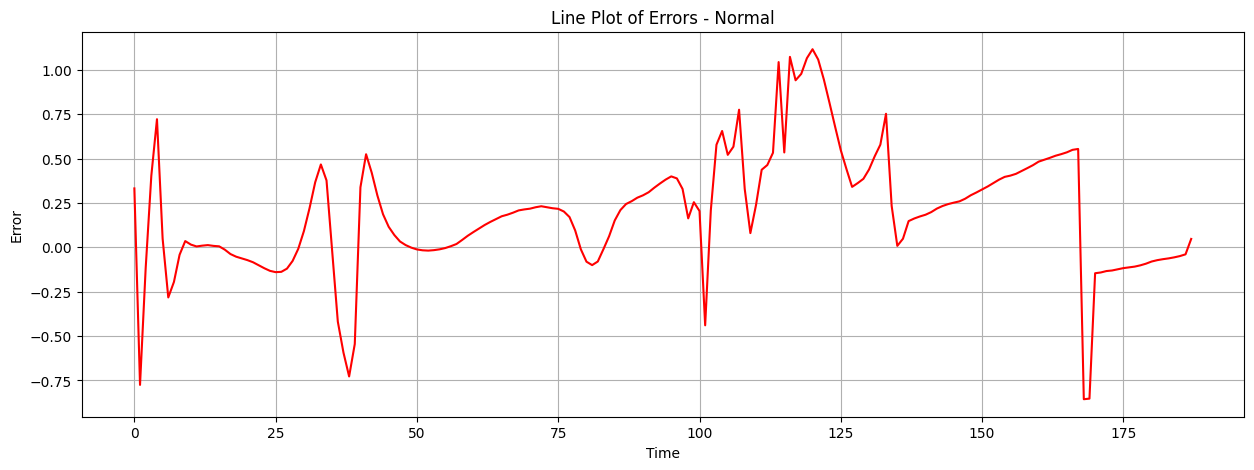

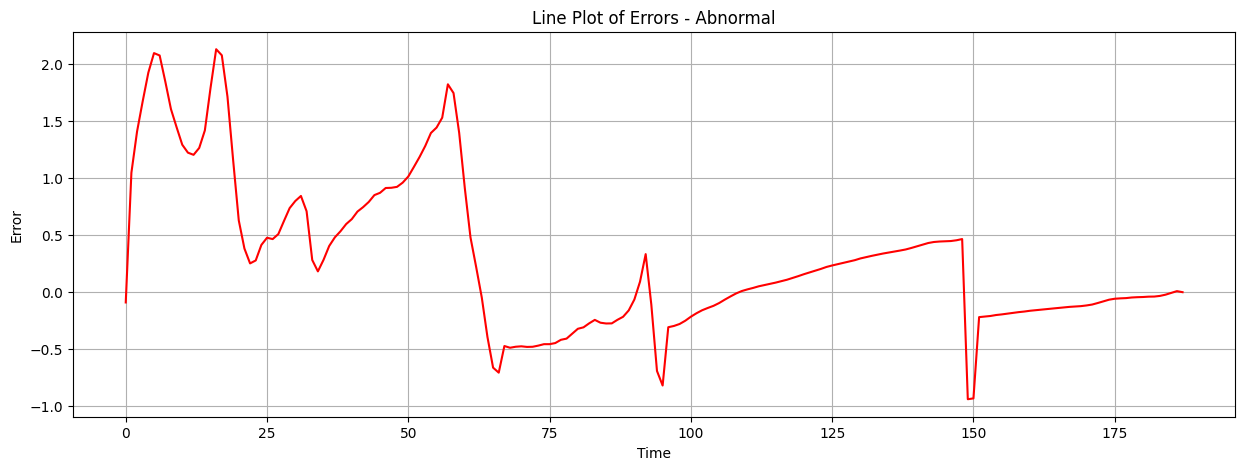

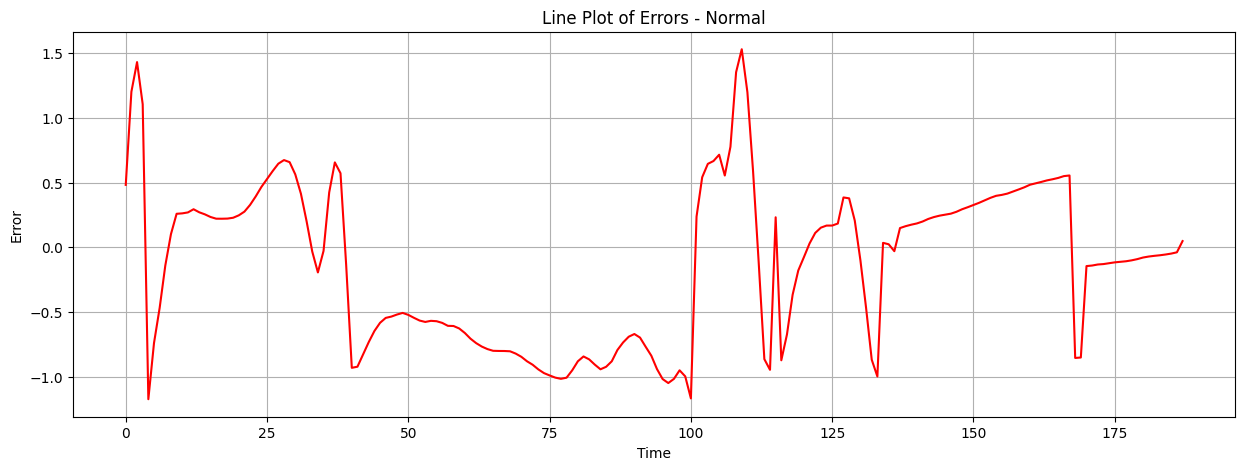

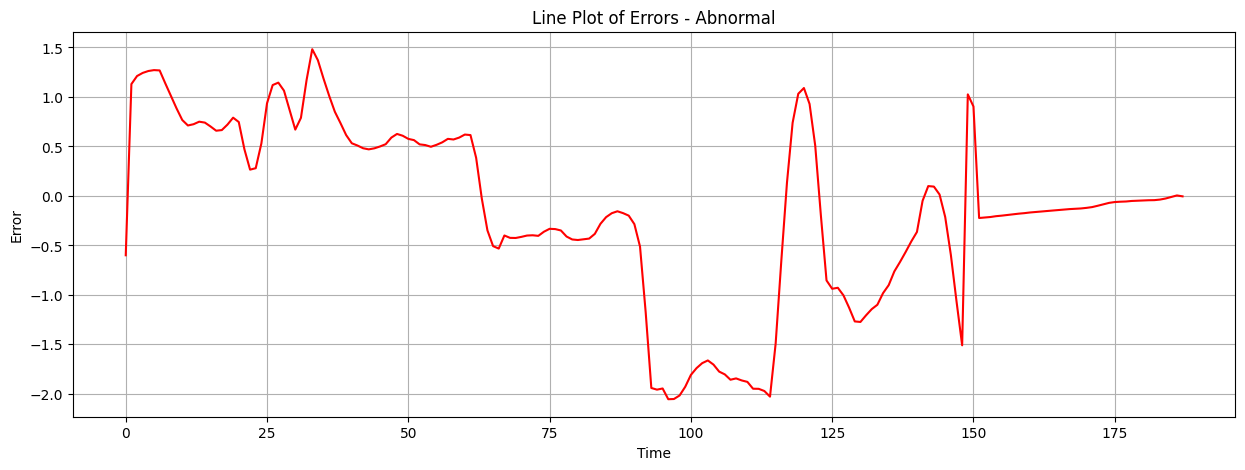

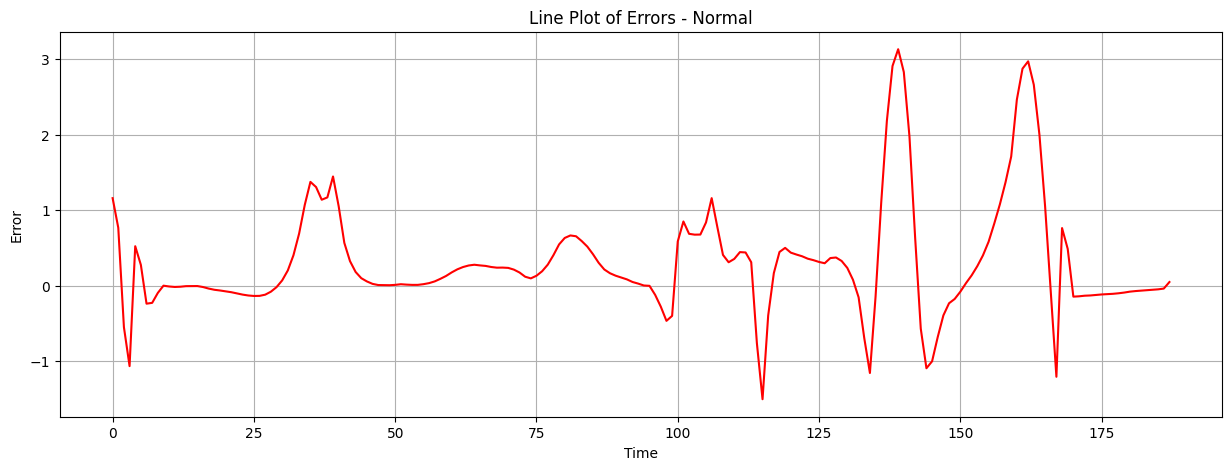

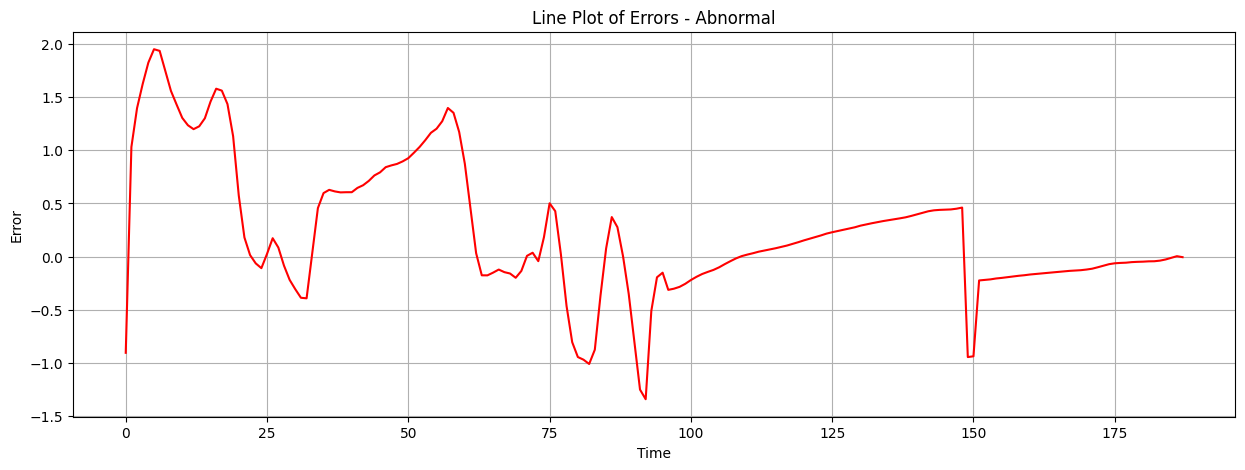


Normal Error Statistics:
           mean       std       max       min
count  3.000000  3.000000  3.000000  3.000000
mean   0.120718  0.556037  1.925316 -1.178205
std    0.224763  0.202165  1.062604  0.323869
min   -0.130499  0.333689  1.116691 -1.503665
25%    0.029692  0.469660  1.323559 -1.339331
50%    0.189882  0.605631  1.530428 -1.174996
75%    0.246327  0.667211  2.329628 -1.015474
max    0.302772  0.728790  3.128829 -0.855952

Abnormal Error Statistics:
           mean       std       max       min
count  3.000000  3.000000  3.000000  3.000000
mean   0.128030  0.724186  1.852565 -1.445410
std    0.227897  0.148368  0.332610  0.563192
min   -0.133004  0.622799  1.482304 -2.054195
25%    0.048342  0.639040  1.715814 -1.696628
50%    0.229687  0.655282  1.949323 -1.339060
75%    0.258547  0.774879  2.037695 -1.141018
max    0.287407  0.894476  2.126067 -0.942975


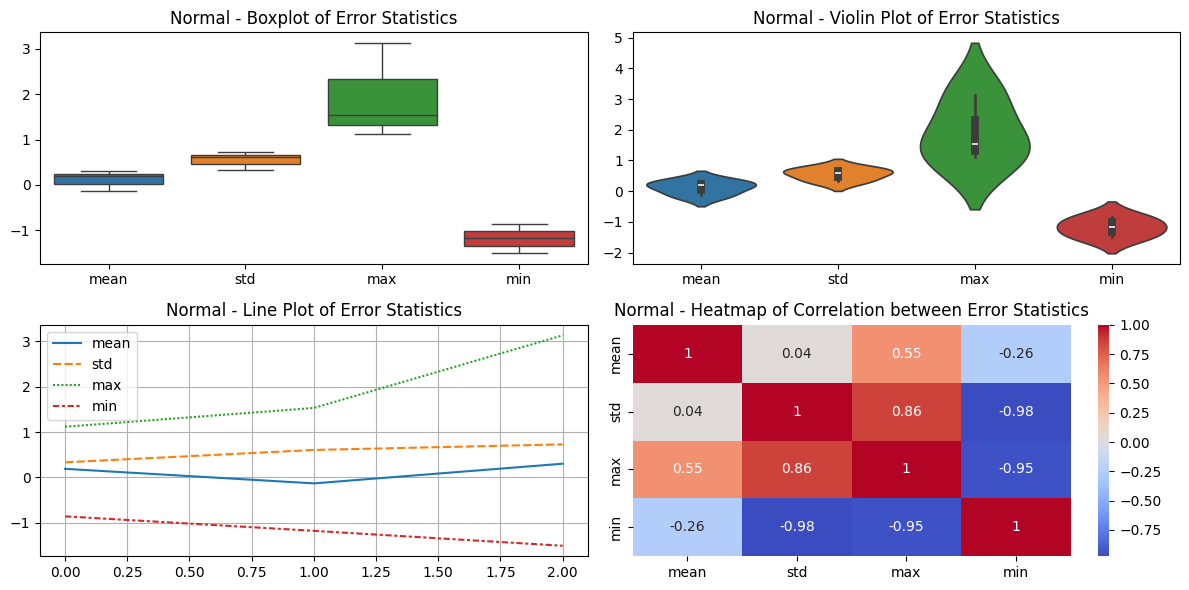

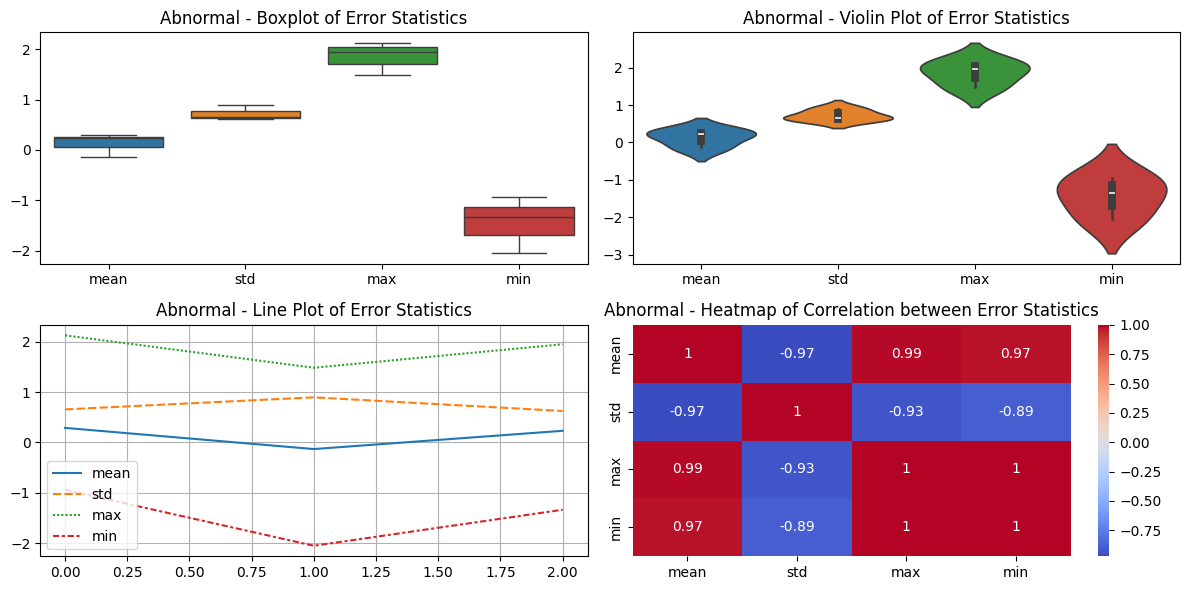

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
import os

# Define the path to the data directory
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Paths to the original and converted CSV files
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'
converted_normal_data_path = f'{data_dir}normal_samples_converted.csv'
converted_abnormal_data_path = f'{data_dir}abnormal_samples_converted.csv'

# Load the CSV files
original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)
converted_normal_data = pd.read_csv(converted_normal_data_path, header=None)
converted_abnormal_data = pd.read_csv(converted_abnormal_data_path, header=None)

# Function to adjust the number of columns to a fixed size
def adjust_columns(df, target_columns=188):
    if df.shape[1] > target_columns:
        return df.iloc[:, :target_columns]
    elif df.shape[1] < target_columns:
        # Pad with zeros if fewer columns
        padding = pd.DataFrame(np.zeros((df.shape[0], target_columns - df.shape[1])))
        return pd.concat([df, padding], axis=1)
    else:
        return df

# Adjust the number of columns in each dataframe
original_normal_data = adjust_columns(original_normal_data)
original_abnormal_data = adjust_columns(original_abnormal_data)
converted_normal_data = adjust_columns(converted_normal_data)
converted_abnormal_data = adjust_columns(converted_abnormal_data)

# Function to apply smoothing
def apply_smoothing(data):
    return savgol_filter(data, window_length=11, polyorder=3)

# Apply smoothing to the original and converted data
original_normal_data_smoothed = original_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
original_abnormal_data_smoothed = original_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_normal_data_smoothed = converted_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_abnormal_data_smoothed = converted_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')

# Normalize the data
scaler = StandardScaler()
original_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_normal_data_smoothed))
original_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_abnormal_data_smoothed))
converted_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_normal_data_smoothed))
converted_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_abnormal_data_smoothed))

# Save the adjusted DataFrames back to CSV files (optional)
original_normal_data_smoothed.to_csv(f'{data_dir}original_normal_data_smoothed.csv', index=False, header=False)
original_abnormal_data_smoothed.to_csv(f'{data_dir}original_abnormal_data_smoothed.csv', index=False, header=False)
converted_normal_data_smoothed.to_csv(f'{data_dir}converted_normal_data_smoothed.csv', index=False, header=False)
converted_abnormal_data_smoothed.to_csv(f'{data_dir}converted_abnormal_data_smoothed.csv', index=False, header=False)

# Function to compute Mean Squared Error (MSE)
def mse(dataA, dataB):
    return np.mean((dataA - dataB) ** 2)

# Align and compare data for all samples using linear interpolation
def align_and_compare(data1, data2):
    min_len = min(len(data1), len(data2))
    data1_interp = np.interp(np.linspace(0, len(data1), min_len), np.arange(len(data1)), data1)
    data2_interp = np.interp(np.linspace(0, len(data2), min_len), np.arange(len(data2)), data2)
    return data1_interp, data2_interp

# Align and compare data for all samples
results = []

# Ensure both datasets have the same length for alignment
min_len_normal = min(len(original_normal_data_smoothed), len(converted_normal_data_smoothed))
min_len_abnormal = min(len(original_abnormal_data_smoothed), len(converted_abnormal_data_smoothed))

# Iterate over the minimum length
for i in range(min_len_normal):
    original_normal_aligned, converted_normal_aligned = align_and_compare(original_normal_data_smoothed.iloc[i], converted_normal_data_smoothed.iloc[i])
    ssim_score = ssim(original_normal_aligned, converted_normal_aligned)
    mse_score = mse(original_normal_aligned, converted_normal_aligned)
    results.append(('Normal', i, ssim_score, mse_score))

for i in range(min_len_abnormal):
    original_abnormal_aligned, converted_abnormal_aligned = align_and_compare(original_abnormal_data_smoothed.iloc[i], converted_abnormal_data_smoothed.iloc[i])
    ssim_score = ssim(original_abnormal_aligned, converted_abnormal_aligned)
    mse_score = mse(original_abnormal_aligned, converted_abnormal_aligned)
    results.append(('Abnormal', i, ssim_score, mse_score))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Type', 'Sample', 'SSIM', 'MSE'])

# Display the results
print(results_df)

# Plot SSIM and MSE for Normal and Abnormal samples separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='SSIM', hue='Type', data=results_df)
plt.title('SSIM Comparison between Original and Converted Data')
plt.ylabel('SSIM')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.savefig('plots/ssim_comparison.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='MSE', hue='Type', data=results_df)
plt.title('MSE Comparison between Original and Converted Data')
plt.ylabel('MSE')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.savefig('plots/mse_comparison.png', dpi=300)
plt.show()

# Simulate re-converted data by using the existing converted data
reconverted_normal_data = converted_normal_data_smoothed.copy()
reconverted_abnormal_data = converted_abnormal_data_smoothed.copy()

# Calculate the errors between original CSV data and re-converted data
normal_error_csv = original_normal_data_smoothed.iloc[:len(reconverted_normal_data)].to_numpy() - reconverted_normal_data.to_numpy()
abnormal_error_csv = original_abnormal_data_smoothed.iloc[:len(reconverted_abnormal_data)].to_numpy() - reconverted_abnormal_data.to_numpy()

# Plot original, converted, and difference waveforms for each sample
def plot_waveforms(original, converted, diff, title, sample_index):
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(original, label='Original', linestyle=':', color='orange')
    plt.title(f'{title} - Original')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(converted, label='Converted', linestyle='--', color='blue')
    plt.title(f'{title} - Converted')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(diff, label='Difference', linestyle='-', color='green')
    plt.title(f'{title} - Difference')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'plots/{title}_sample_{sample_index}.png', dpi=300)
    plt.show()

# Plot waveforms and differences for normal data
for i in range(len(reconverted_normal_data)):
    plot_waveforms(original_normal_data_smoothed.iloc[i], reconverted_normal_data.iloc[i], normal_error_csv[i], 'Normal', i)

# Plot waveforms and differences for abnormal data
for i in range(len(reconverted_abnormal_data)):
    plot_waveforms(original_abnormal_data_smoothed.iloc[i], reconverted_abnormal_data.iloc[i], abnormal_error_csv[i], 'Abnormal', i)

# Plot heatmap for normal data error
plt.figure(figsize=(15, 5))
sns.heatmap(normal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Normal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.savefig('plots/heatmap_normal_error.png', dpi=300)
plt.show()

# Plot heatmap for abnormal data error
plt.figure(figsize=(15, 5))
sns.heatmap(abnormal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Abnormal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.savefig('plots/heatmap_abnormal_error.png', dpi=300)
plt.show()

# Plot histogram of errors for each sample
def plot_error_histogram(errors, title, sample_index):
    plt.figure(figsize=(15, 5))
    plt.hist(errors.flatten(), bins=50, color='purple', alpha=0.7)
    plt.title(f'Histogram of Errors - {title}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(f'plots/histogram_errors_{title}_sample_{sample_index}.png', dpi=300)
    plt.show()

# Plot error histograms
for i in range(len(reconverted_normal_data)):
    plot_error_histogram(normal_error_csv[i], 'Normal', i)
    plot_error_histogram(abnormal_error_csv[i], 'Abnormal', i)

# Plot line plots of errors for each sample
def plot_error_line(errors, title, sample_index):
    plt.figure(figsize=(15, 5))
    plt.plot(errors, color='red')
    plt.title(f'Line Plot of Errors - {title}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.grid(True)
    plt.savefig(f'plots/line_plot_errors_{title}_sample_{sample_index}.png', dpi=300)
    plt.show()

# Plot error line plots
for i in range(len(reconverted_normal_data)):
    plot_error_line(normal_error_csv[i], 'Normal', i)
    plot_error_line(abnormal_error_csv[i], 'Abnormal', i)

# Statistical analysis of errors
normal_error_stats = {
    'mean': np.mean(normal_error_csv, axis=1),
    'std': np.std(normal_error_csv, axis=1),
    'max': np.max(normal_error_csv, axis=1),
    'min': np.min(normal_error_csv, axis=1)
}

abnormal_error_stats = {
    'mean': np.mean(abnormal_error_csv, axis=1),
    'std': np.std(abnormal_error_csv, axis=1),
    'max': np.max(abnormal_error_csv, axis=1),
    'min': np.min(abnormal_error_csv, axis=1)
}

normal_error_df = pd.DataFrame(normal_error_stats)
abnormal_error_df = pd.DataFrame(abnormal_error_stats)

# Display statistical analysis results using standard print function
print("\nNormal Error Statistics:")
print(normal_error_df.describe())

print("\nAbnormal Error Statistics:")
print(abnormal_error_df.describe())

# Plot statistical summaries of errors
def plot_error_statistics(stats_df, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=stats_df[['mean', 'std', 'max', 'min']])
    plt.title(f'{title} - Boxplot of Error Statistics')

    plt.subplot(2, 2, 2)
    sns.violinplot(data=stats_df[['mean', 'std', 'max', 'min']])
    plt.title(f'{title} - Violin Plot of Error Statistics')

    plt.subplot(2, 2, 3)
    sns.lineplot(data=stats_df[['mean', 'std', 'max', 'min']])
    plt.title(f'{title} - Line Plot of Error Statistics')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    sns.heatmap(stats_df[['mean', 'std', 'max', 'min']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'{title} - Heatmap of Correlation between Error Statistics')

    plt.tight_layout()
    plt.savefig(f'plots/{title}_error_statistics.png', dpi=300)
    plt.show()

# Plot statistics for normal and abnormal errors
plot_error_statistics(normal_error_df, 'Normal')
plot_error_statistics(abnormal_error_df, 'Abnormal')


#Detail checking

       Type  Sample      SSIM       MSE
0    Normal       0  0.525317  0.140626
1    Normal       1  0.409392  0.367904
2    Normal       2  0.287171  0.596986
3  Abnormal       0  0.313900  0.503847
4  Abnormal       1  0.163196  0.799281
5  Abnormal       2  0.249910  0.431177


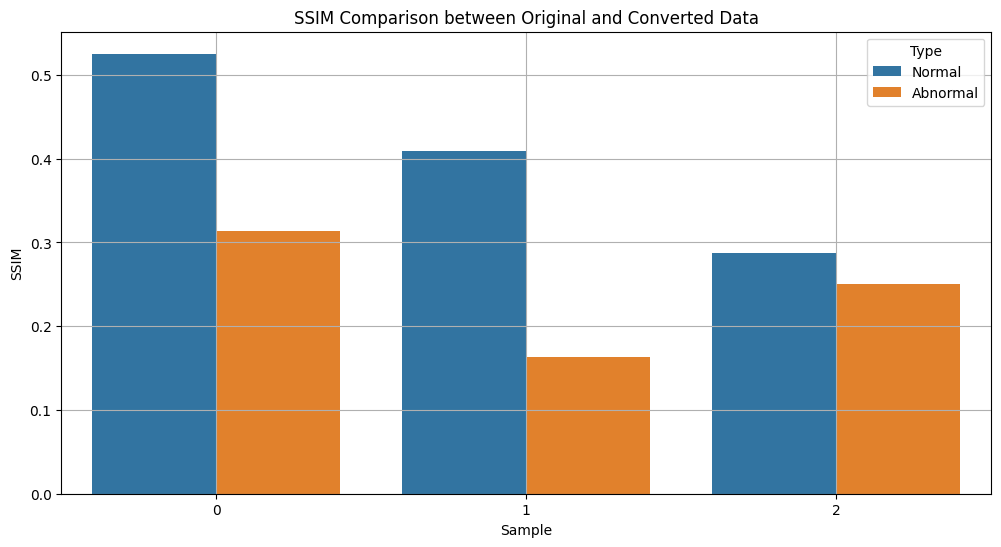

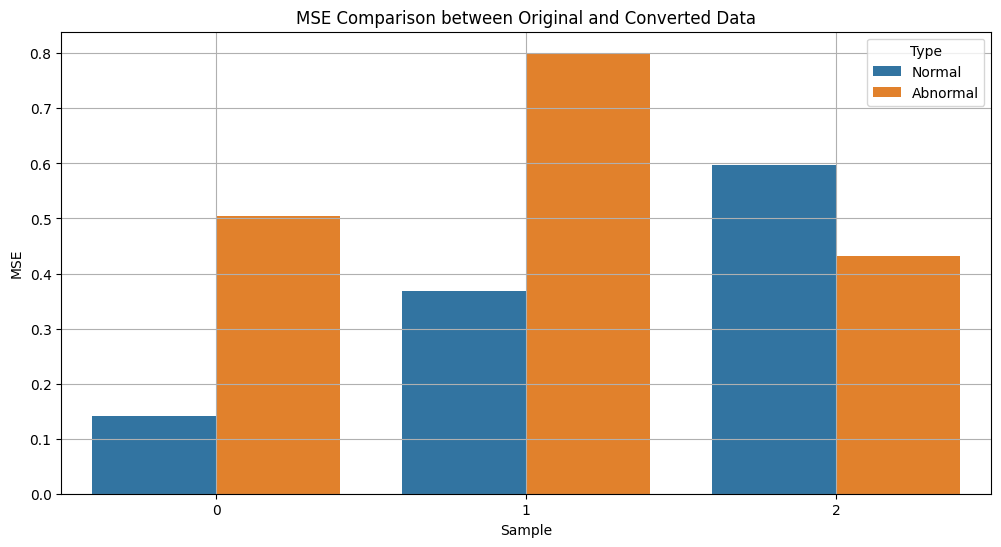

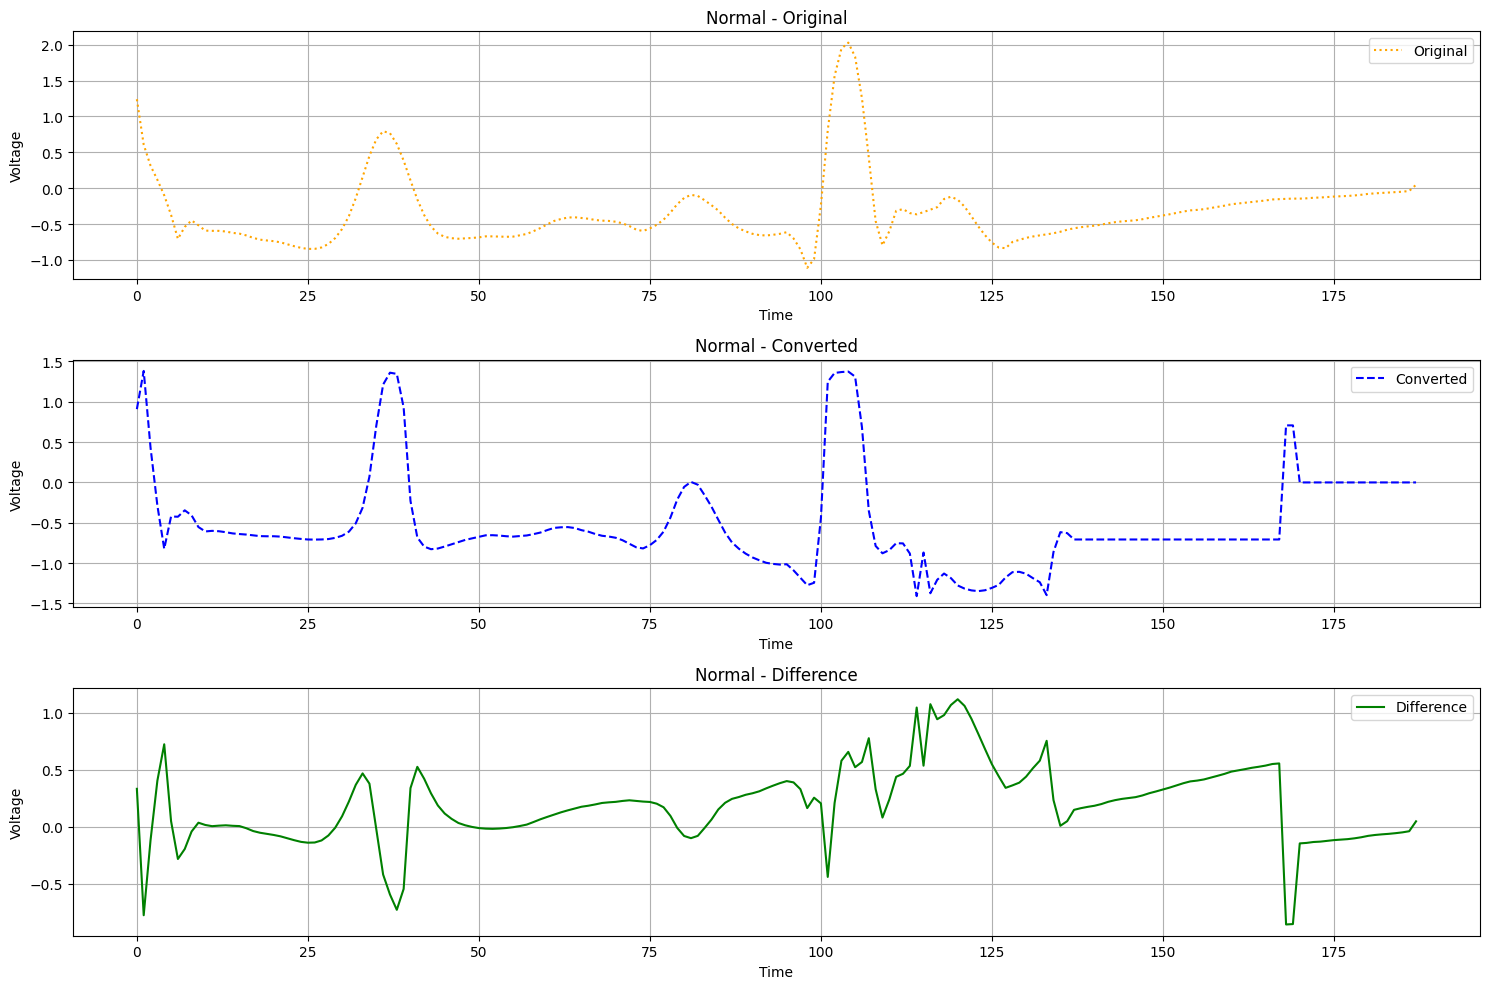

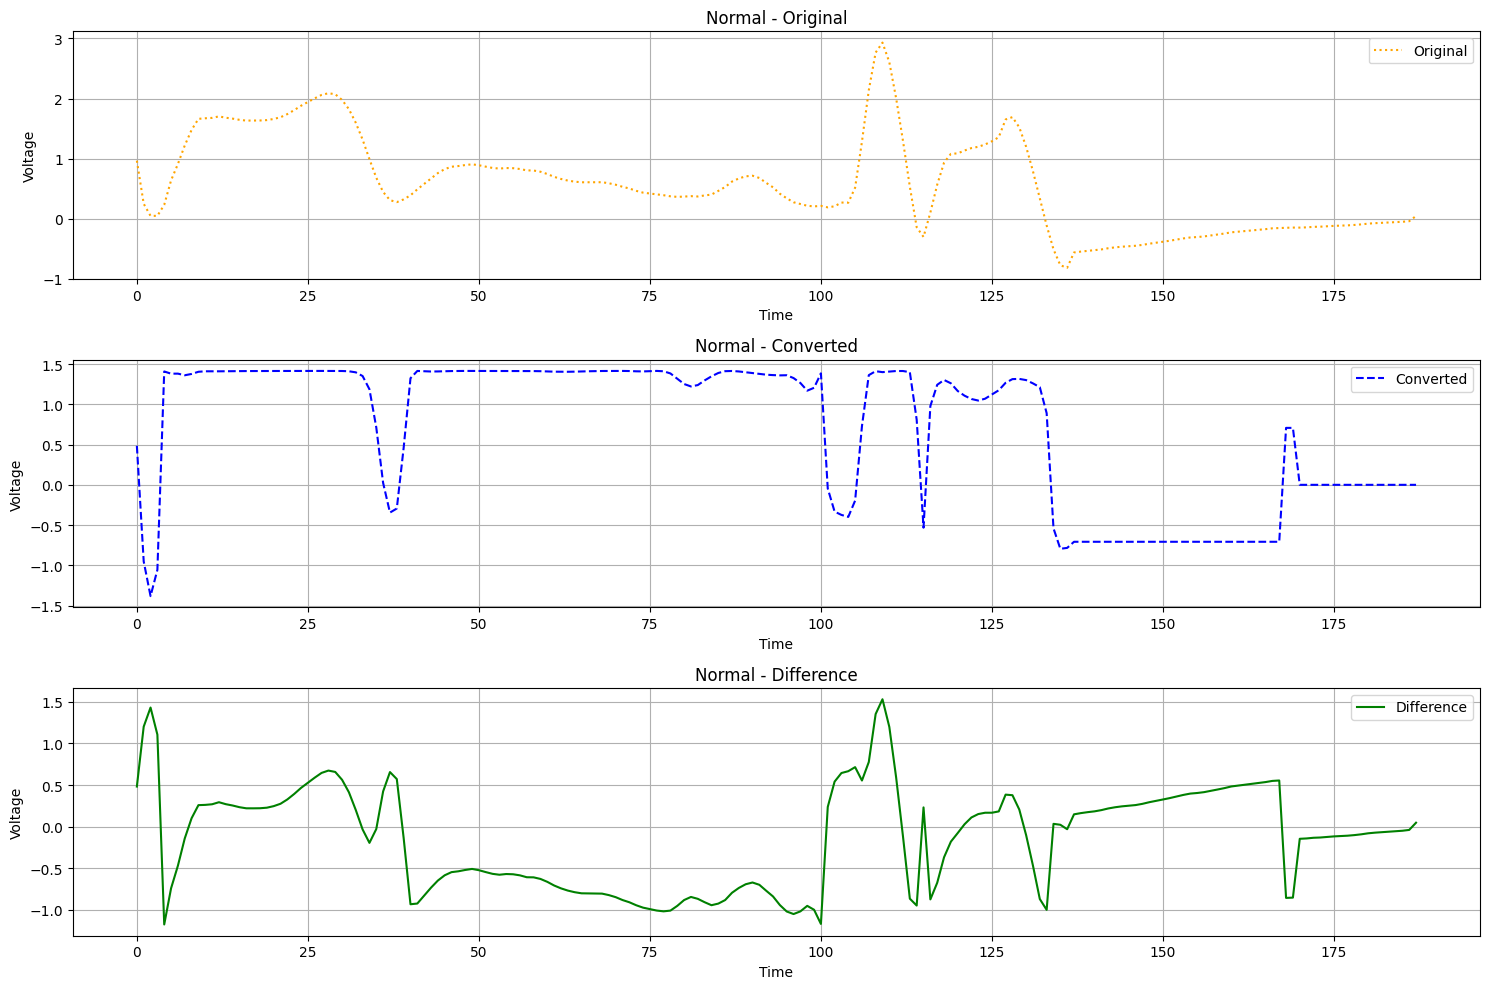

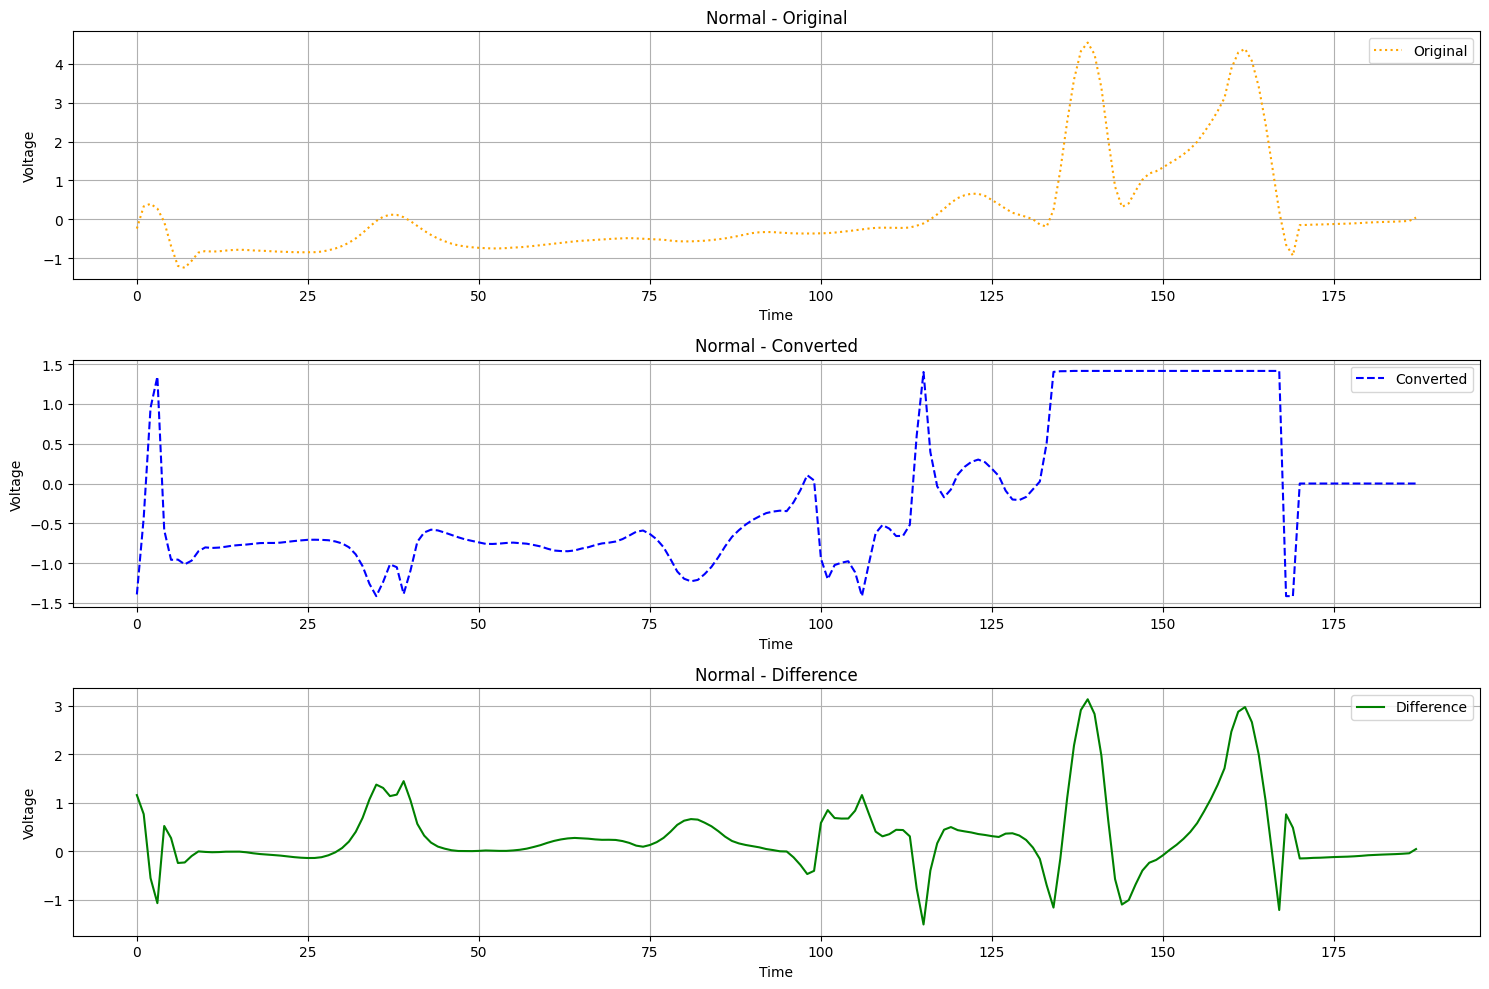

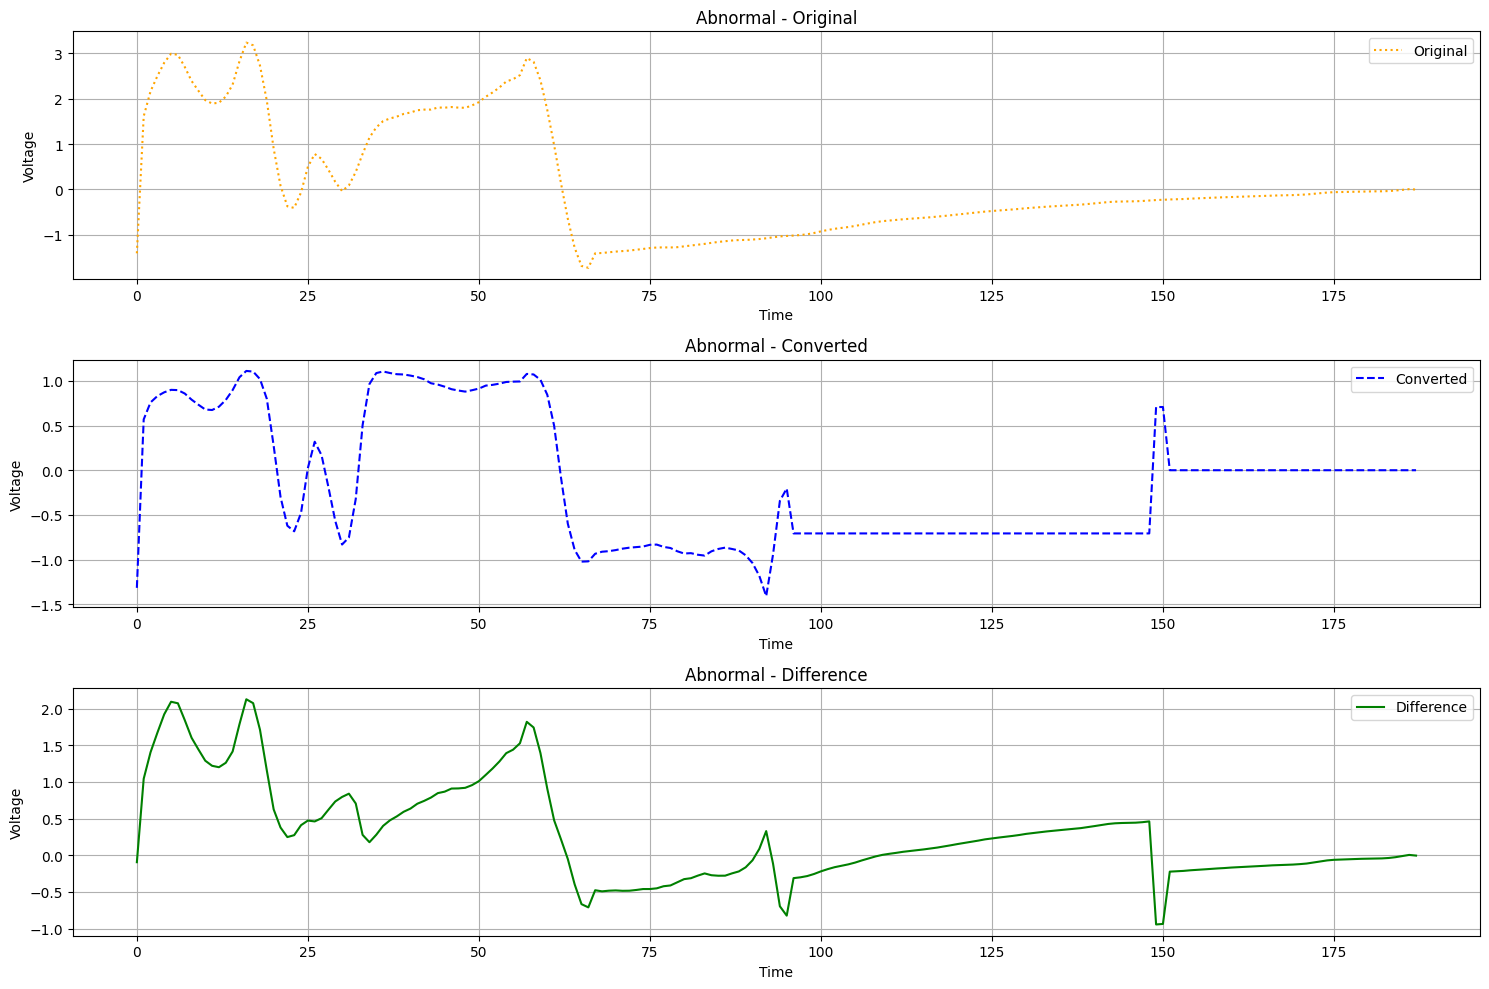

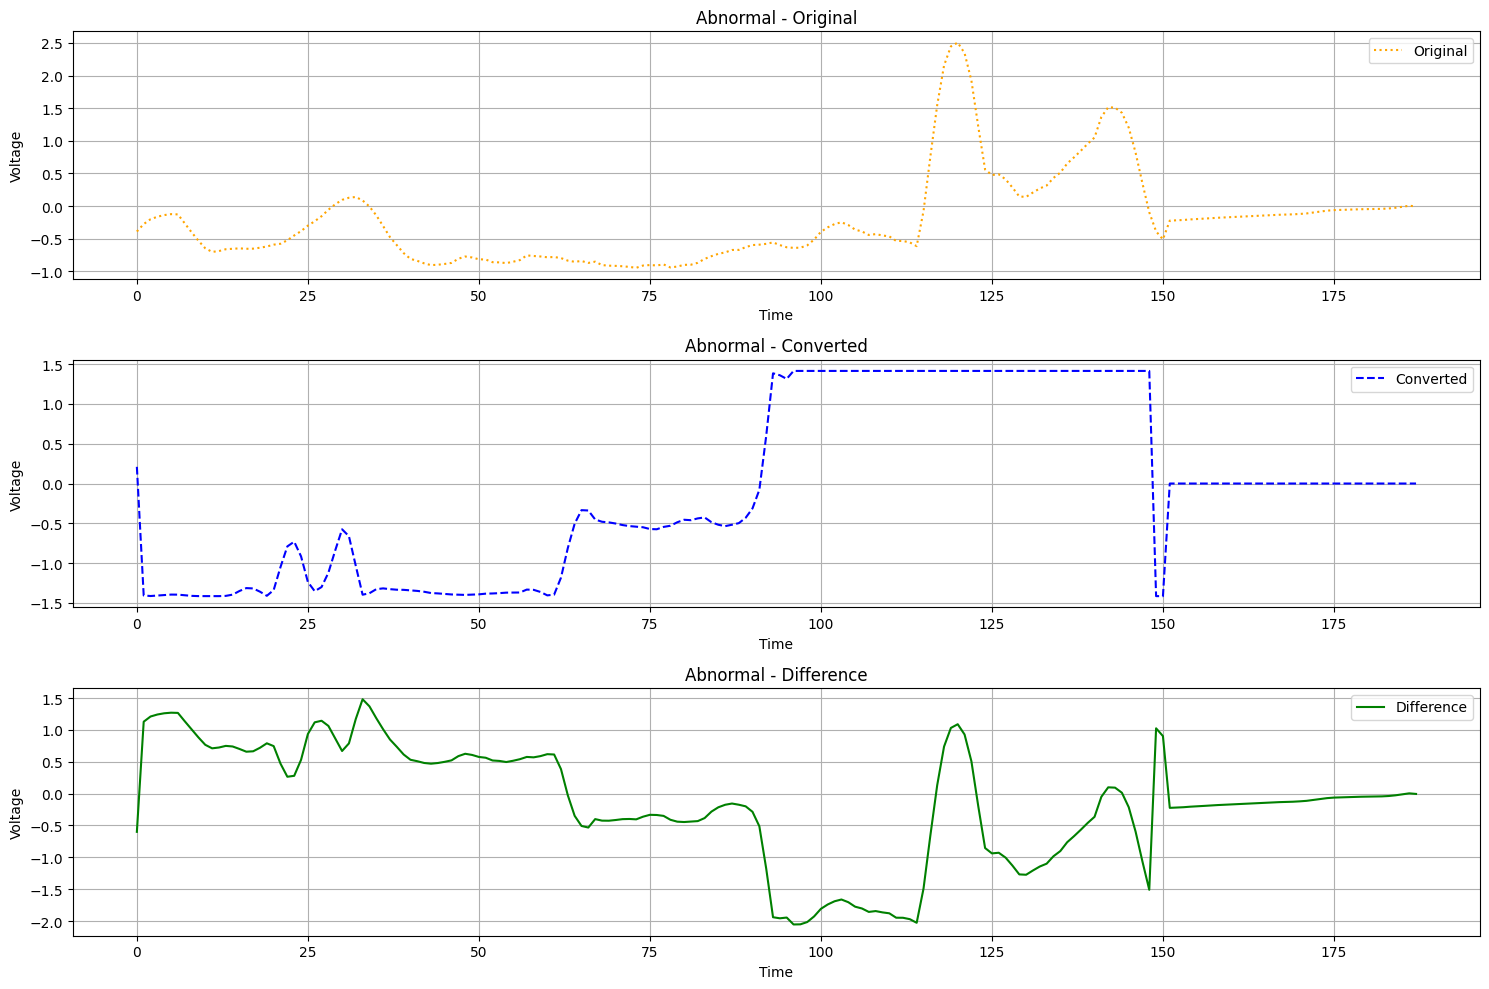

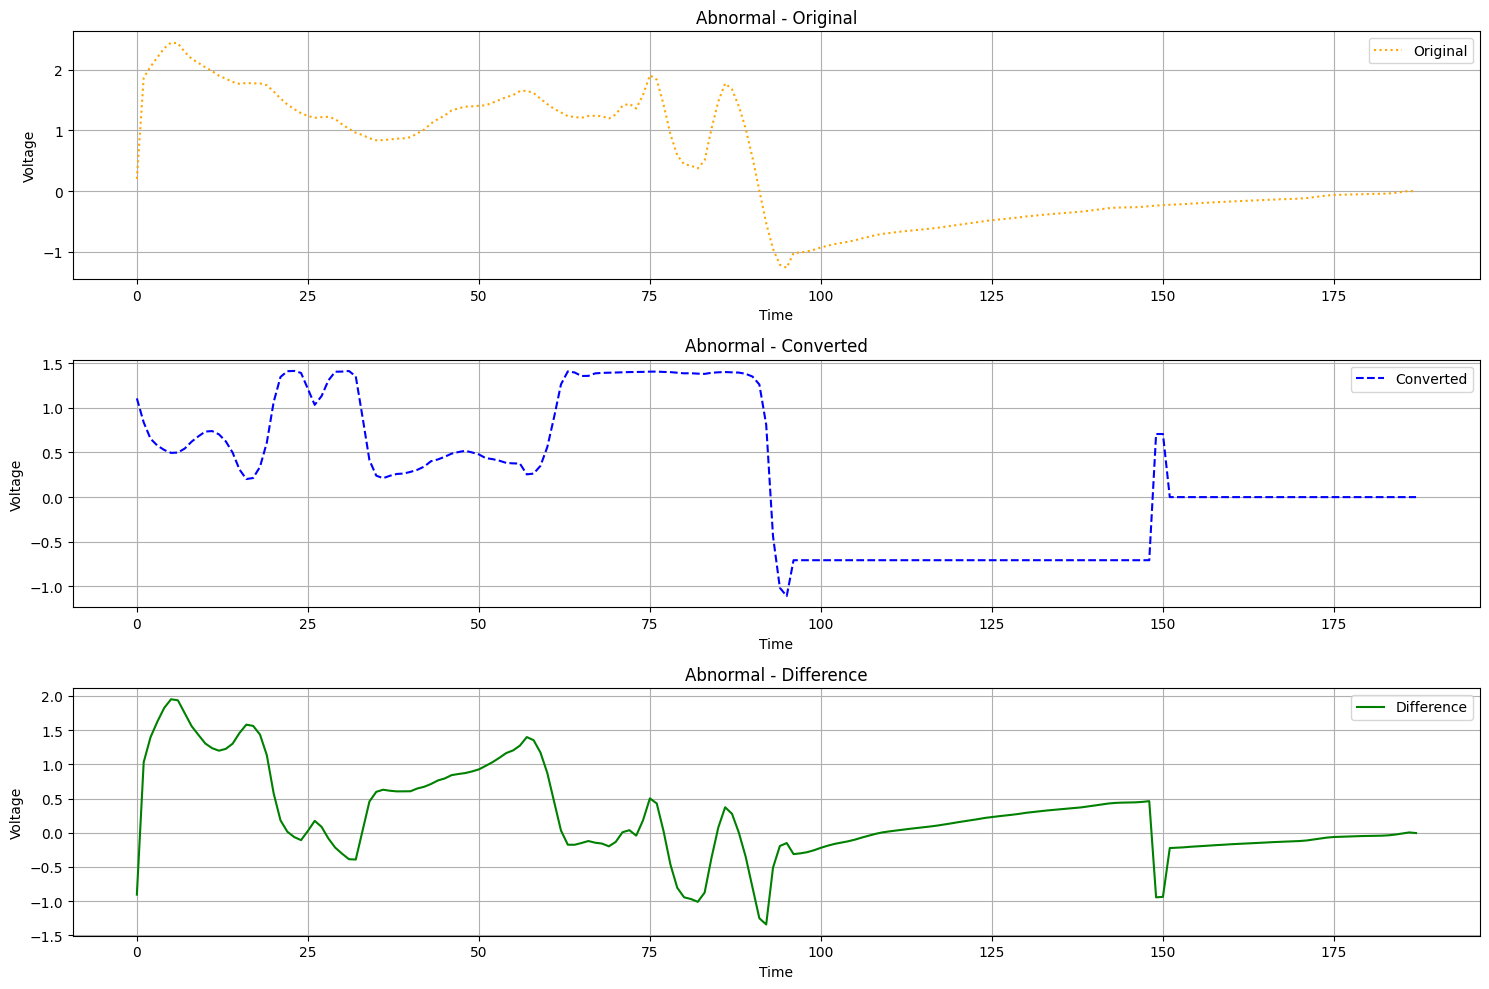

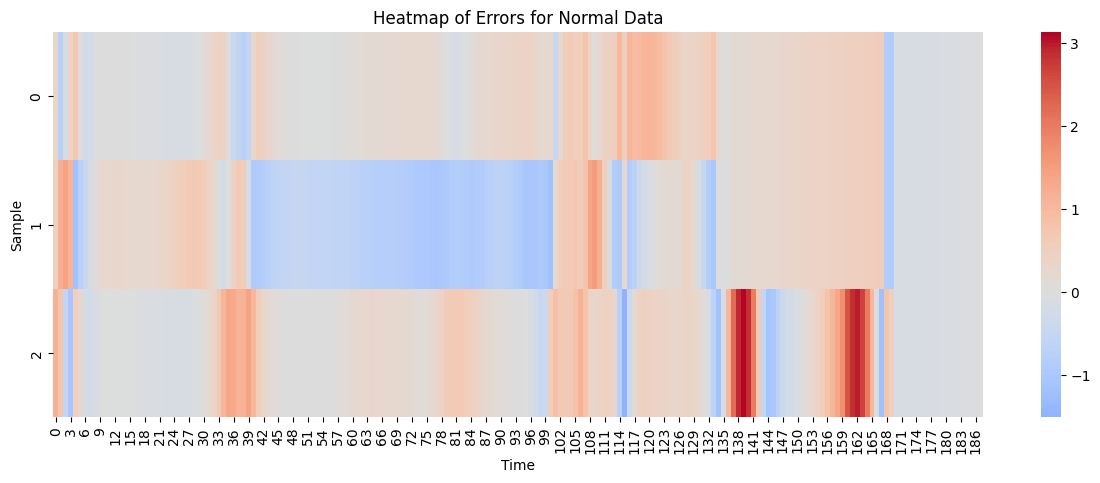

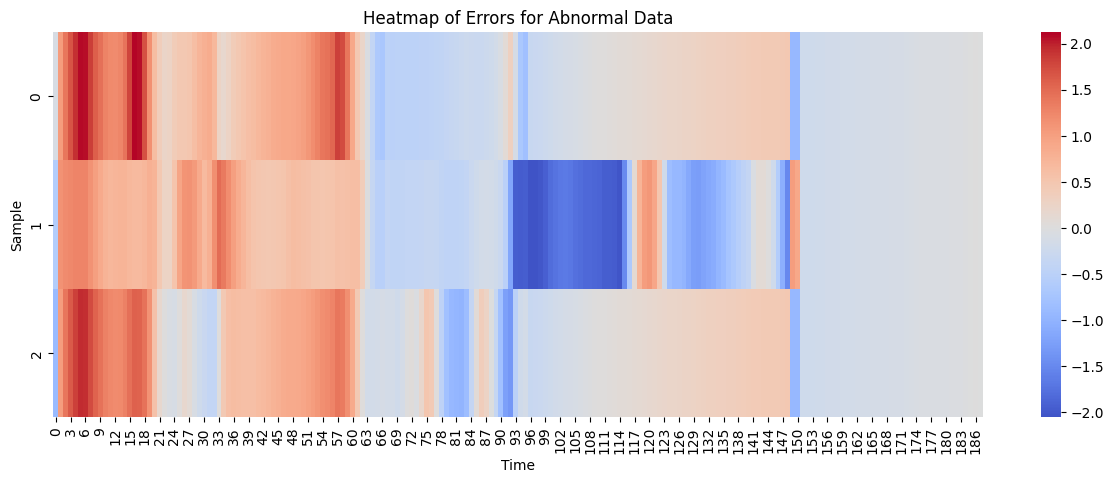

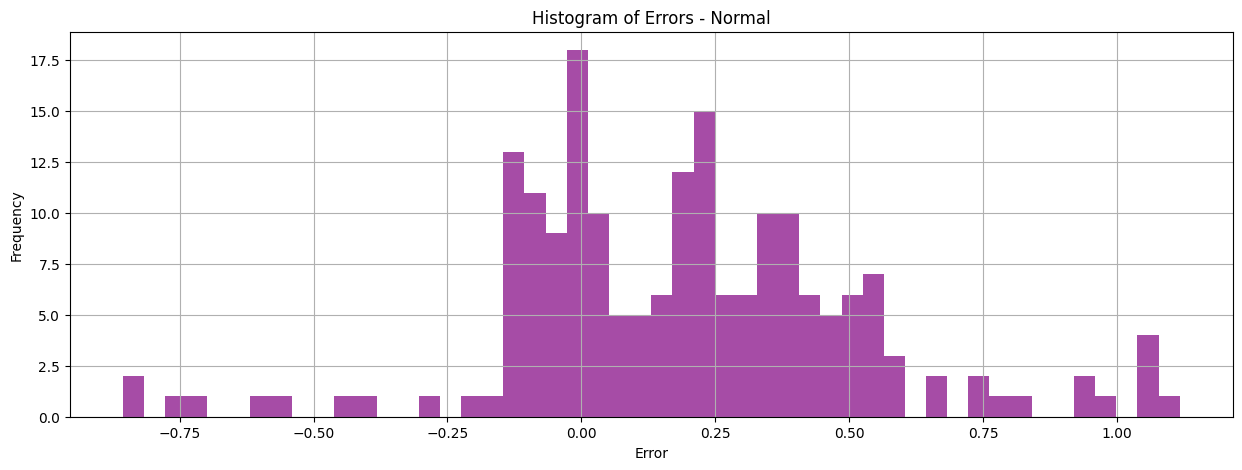

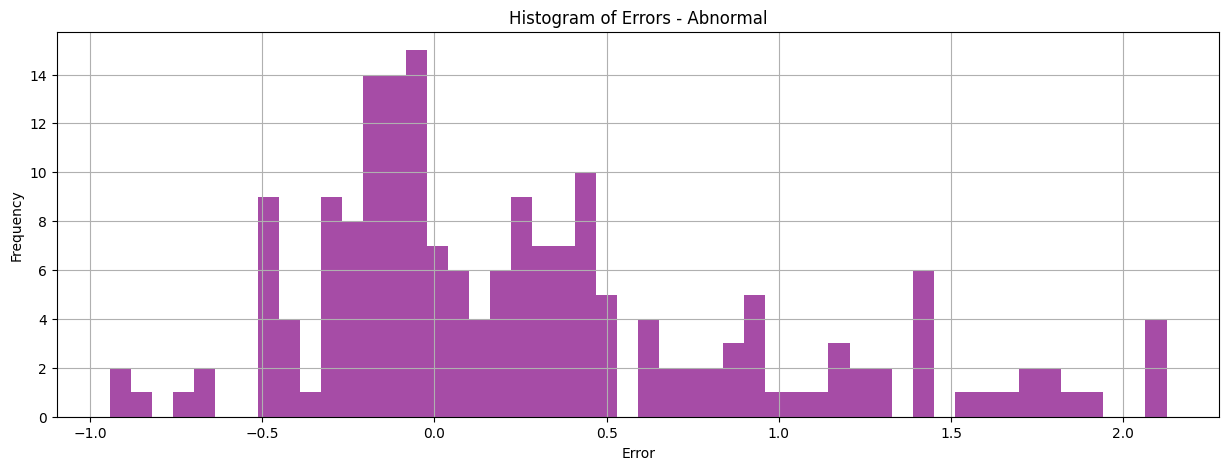

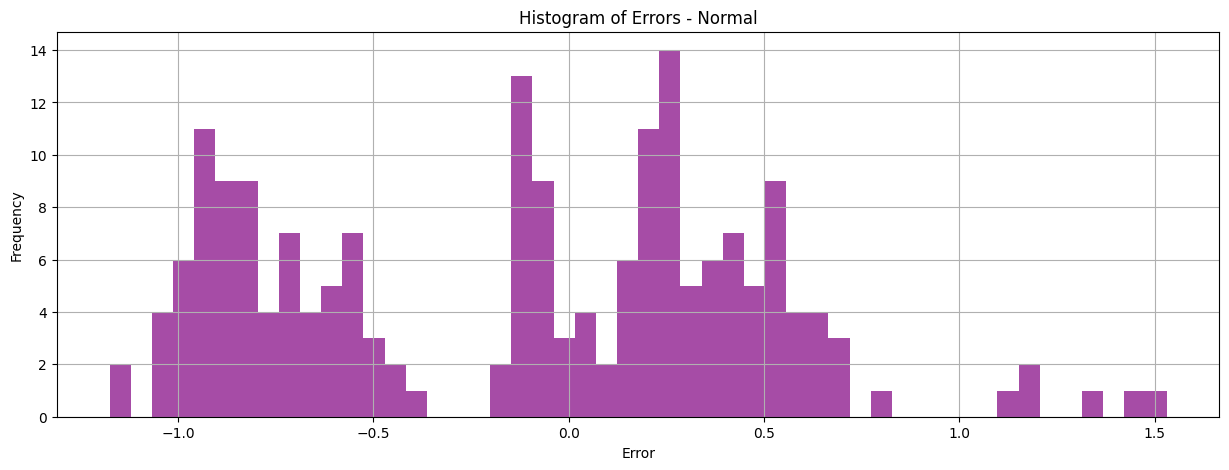

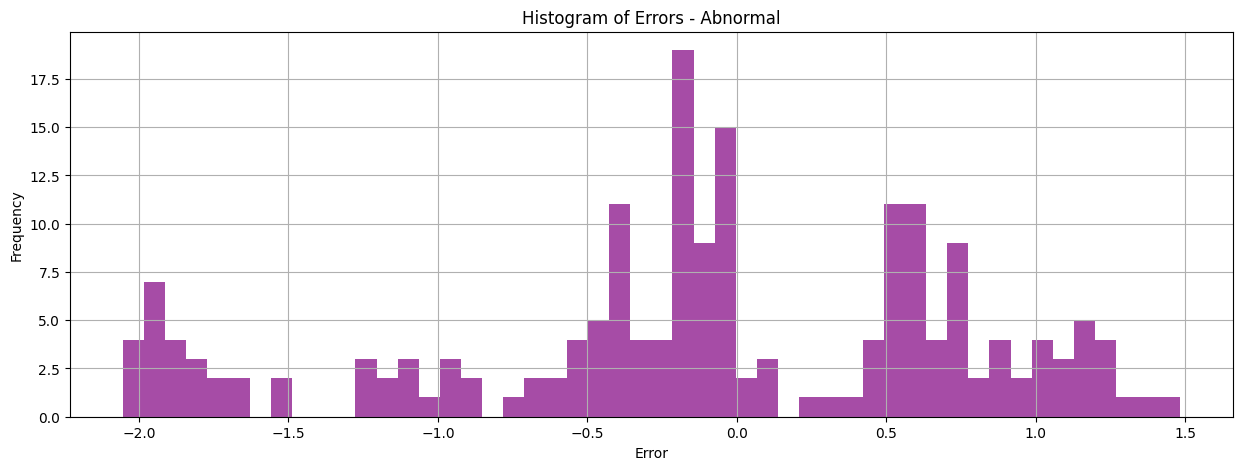

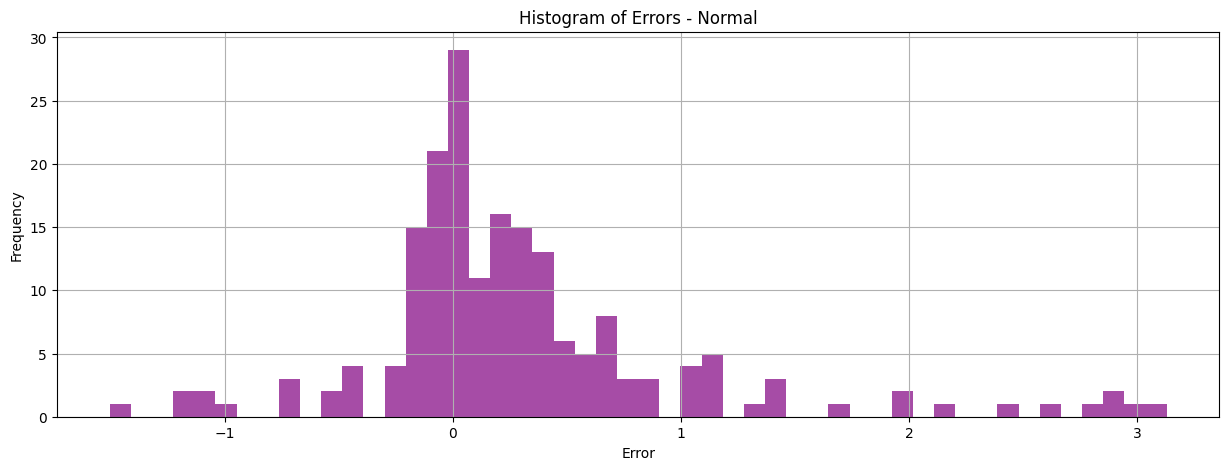

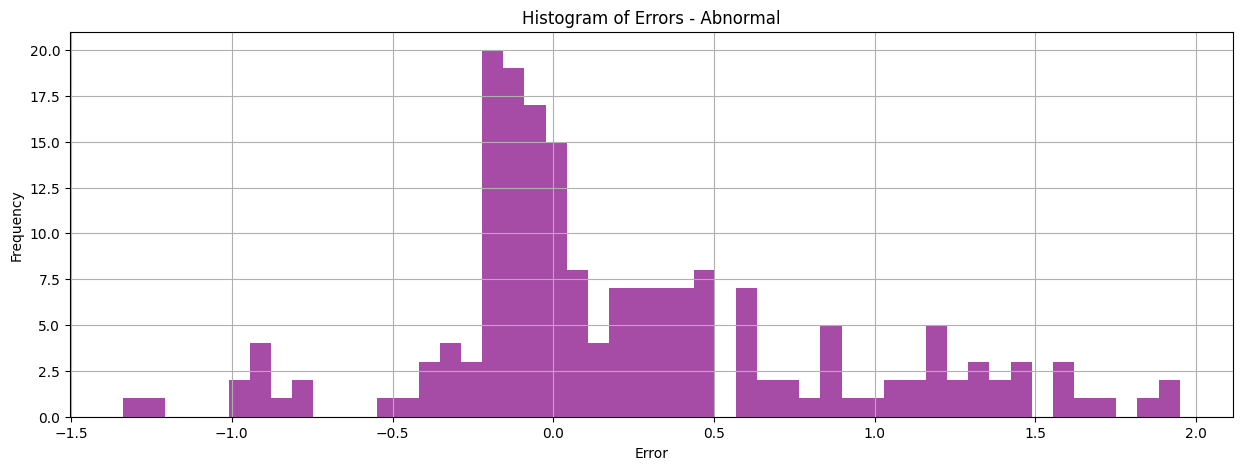

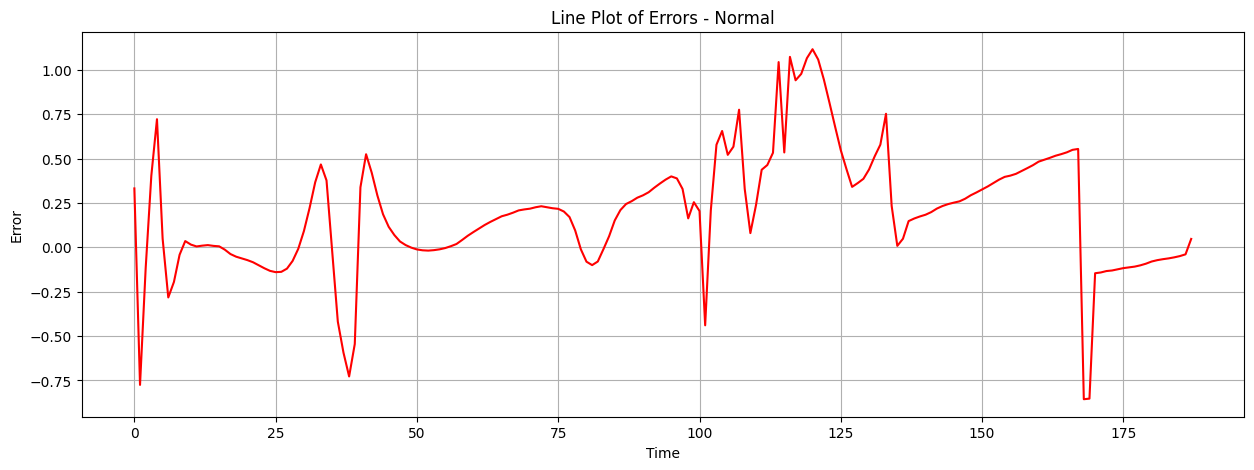

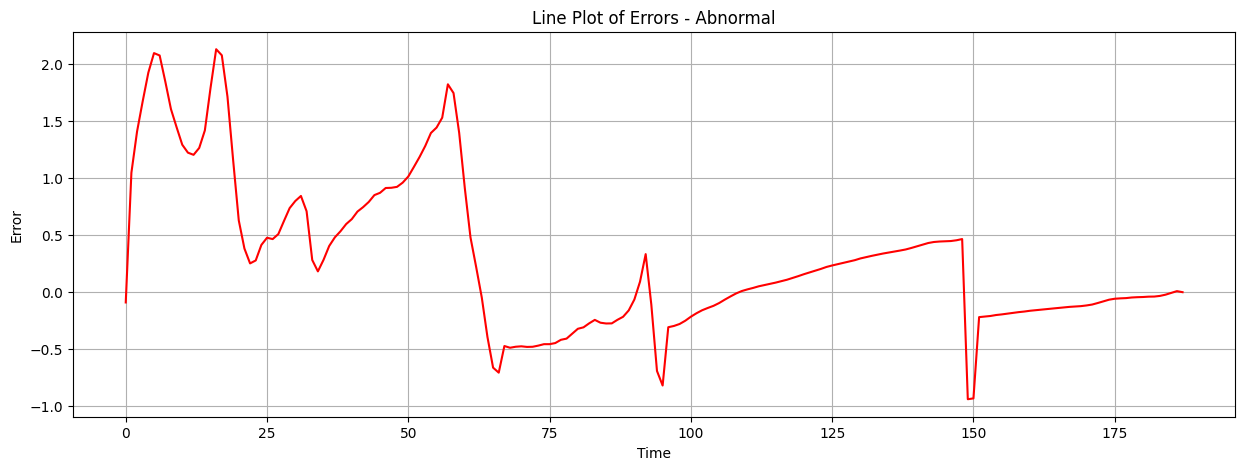

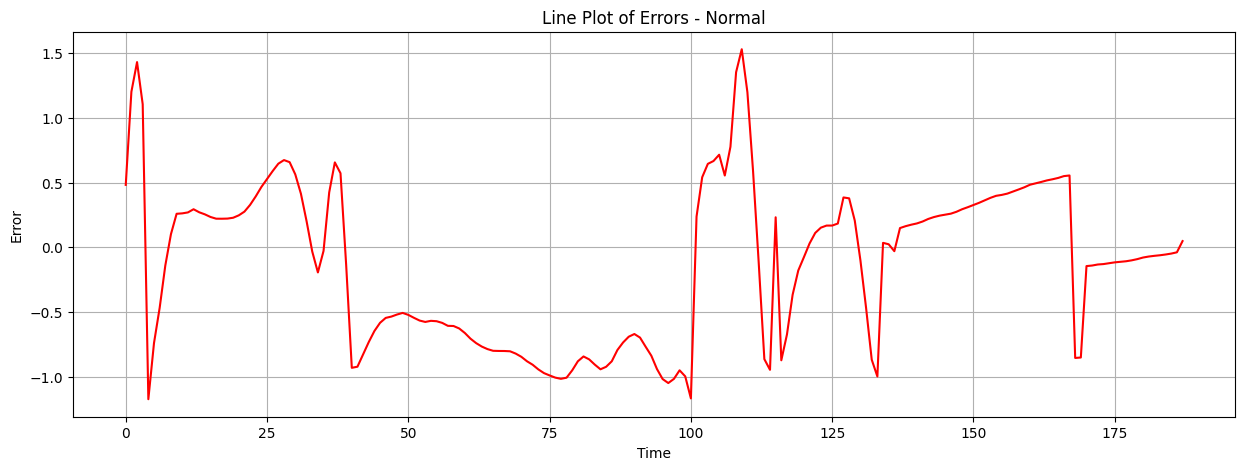

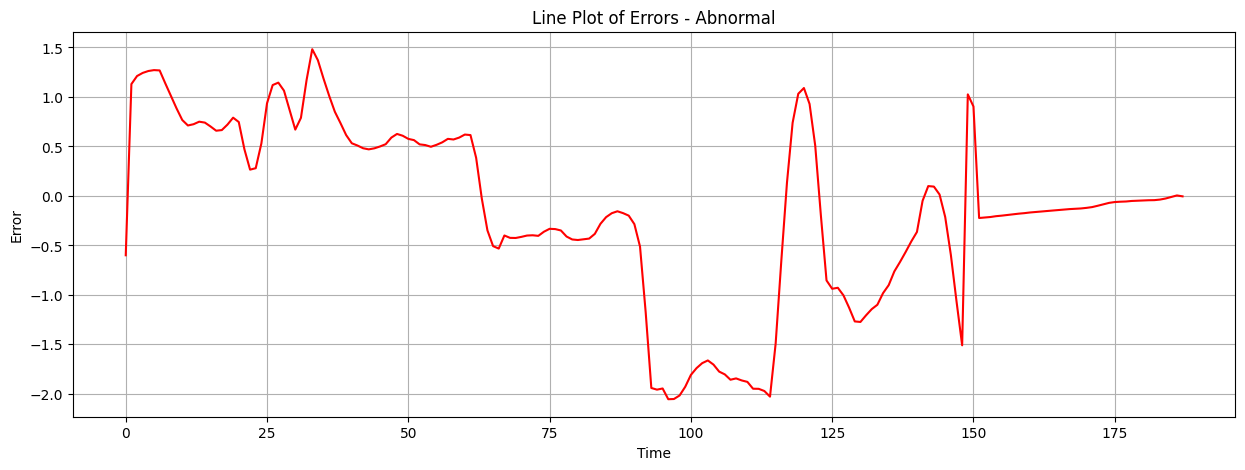

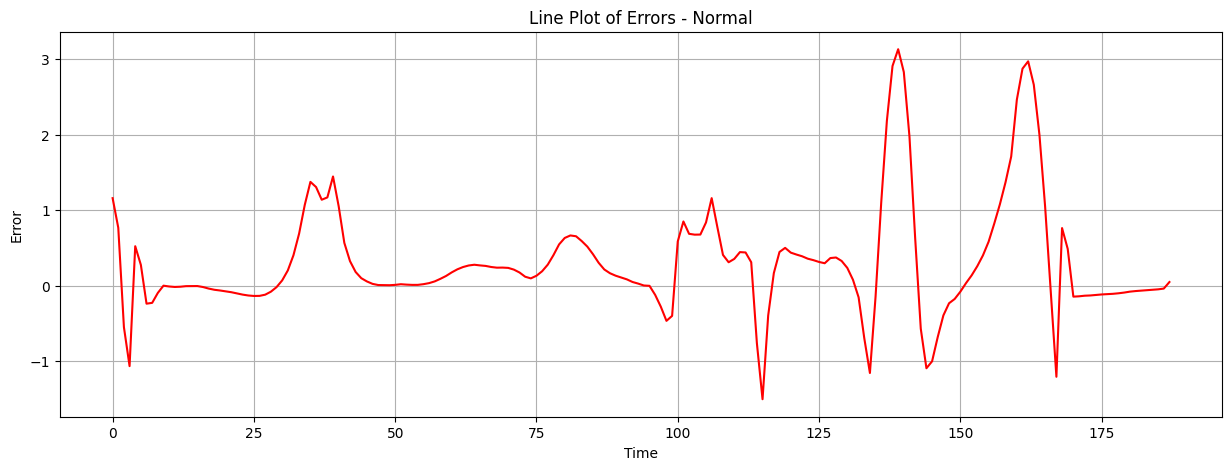

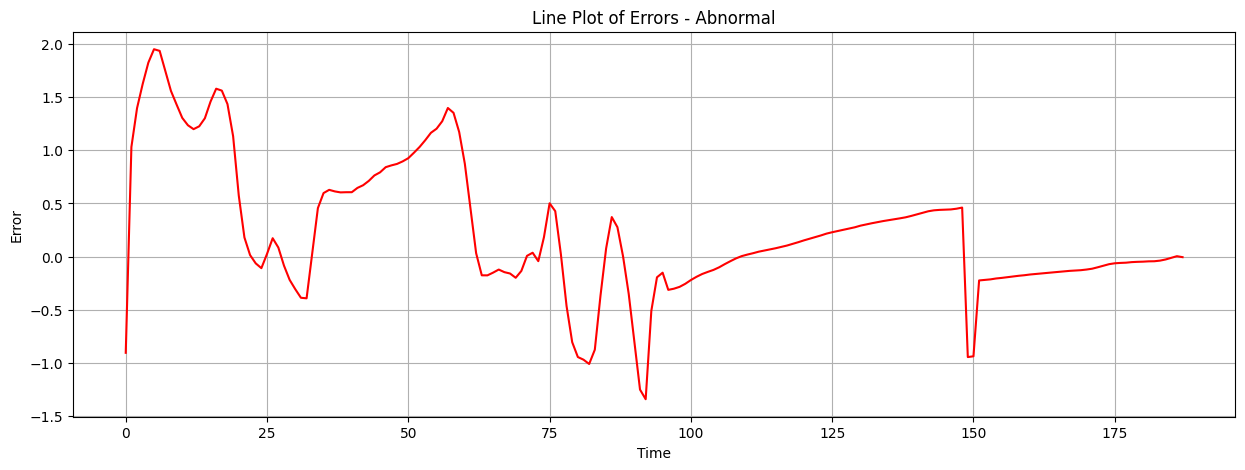


Normal Error Statistics:
           mean       std       max       min
count  3.000000  3.000000  3.000000  3.000000
mean   0.120718  0.556037  1.925316 -1.178205
std    0.224763  0.202165  1.062604  0.323869
min   -0.130499  0.333689  1.116691 -1.503665
25%    0.029692  0.469660  1.323559 -1.339331
50%    0.189882  0.605631  1.530428 -1.174996
75%    0.246327  0.667211  2.329628 -1.015474
max    0.302772  0.728790  3.128829 -0.855952

Abnormal Error Statistics:
           mean       std       max       min
count  3.000000  3.000000  3.000000  3.000000
mean   0.128030  0.724186  1.852565 -1.445410
std    0.227897  0.148368  0.332610  0.563192
min   -0.133004  0.622799  1.482304 -2.054195
25%    0.048342  0.639040  1.715814 -1.696628
50%    0.229687  0.655282  1.949323 -1.339060
75%    0.258547  0.774879  2.037695 -1.141018
max    0.287407  0.894476  2.126067 -0.942975


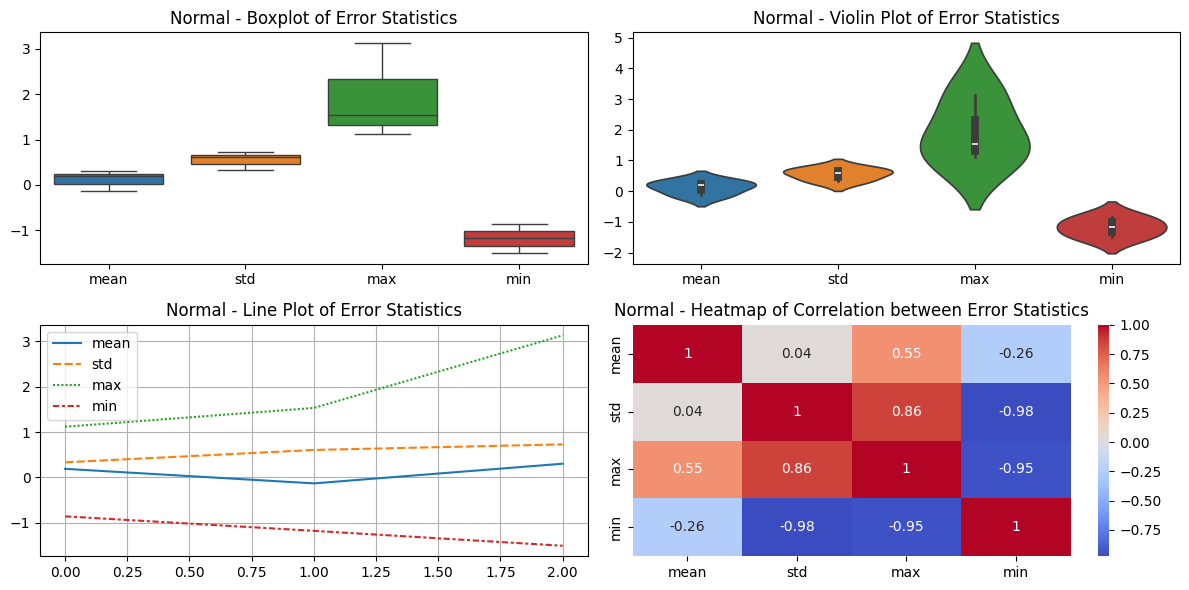

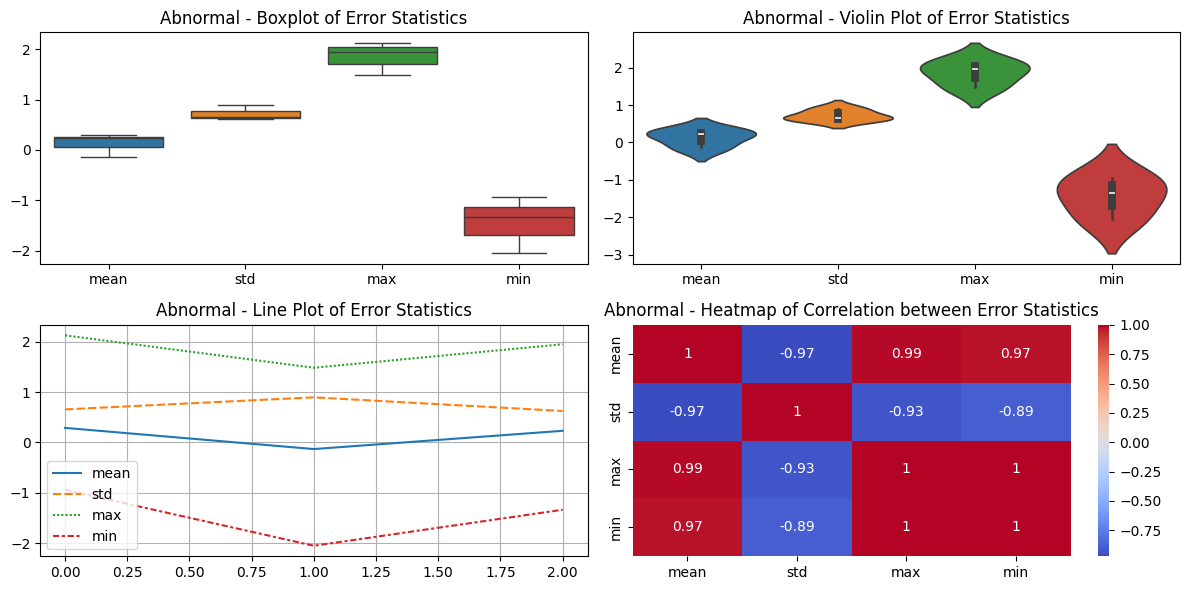

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from PIL import Image
import os

# Define paths to the data
data_dir = '/content/drive/MyDrive/ECG/datas/'
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'
converted_normal_data_path = f'{data_dir}normal_samples_converted.csv'
converted_abnormal_data_path = f'{data_dir}abnormal_samples_converted.csv'

# Load the CSV files
original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)
converted_normal_data = pd.read_csv(converted_normal_data_path, header=None)
converted_abnormal_data = pd.read_csv(converted_abnormal_data_path, header=None)

# Function to adjust the number of columns to a fixed size
def adjust_columns(df, target_columns=188):
    if df.shape[1] > target_columns:
        return df.iloc[:, :target_columns]
    elif df.shape[1] < target_columns:
        padding = pd.DataFrame(np.zeros((df.shape[0], target_columns - df.shape[1])))
        return pd.concat([df, padding], axis=1)
    else:
        return df

# Adjust the number of columns in each dataframe
original_normal_data = adjust_columns(original_normal_data)
original_abnormal_data = adjust_columns(original_abnormal_data)
converted_normal_data = adjust_columns(converted_normal_data)
converted_abnormal_data = adjust_columns(converted_abnormal_data)

# Function to apply smoothing
def apply_smoothing(data):
    return savgol_filter(data, window_length=11, polyorder=3)

# Apply smoothing to the original and converted data
original_normal_data_smoothed = original_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
original_abnormal_data_smoothed = original_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_normal_data_smoothed = converted_normal_data.apply(apply_smoothing, axis=1, result_type='expand')
converted_abnormal_data_smoothed = converted_abnormal_data.apply(apply_smoothing, axis=1, result_type='expand')

# Normalize the data
scaler = StandardScaler()
original_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_normal_data_smoothed))
original_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(original_abnormal_data_smoothed))
converted_normal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_normal_data_smoothed))
converted_abnormal_data_smoothed = pd.DataFrame(scaler.fit_transform(converted_abnormal_data_smoothed))

# Save the adjusted DataFrames back to CSV files (optional)
original_normal_data_smoothed.to_csv(f'{data_dir}original_normal_data_smoothed.csv', index=False, header=False)
original_abnormal_data_smoothed.to_csv(f'{data_dir}original_abnormal_data_smoothed.csv', index=False, header=False)
converted_normal_data_smoothed.to_csv(f'{data_dir}converted_normal_data_smoothed.csv', index=False, header=False)
converted_abnormal_data_smoothed.to_csv(f'{data_dir}converted_abnormal_data_smoothed.csv', index=False, header=False)

# Function to compute Mean Squared Error (MSE)
def mse(dataA, dataB):
    return np.mean((dataA - dataB) ** 2)

# Align and compare data for all samples using linear interpolation
def align_and_compare(data1, data2):
    min_len = min(len(data1), len(data2))
    data1_interp = np.interp(np.linspace(0, len(data1), min_len), np.arange(len(data1)), data1)
    data2_interp = np.interp(np.linspace(0, len(data2), min_len), np.arange(len(data2)), data2)
    return data1_interp, data2_interp

# Align and compare data for all samples
results = []

# Ensure both datasets have the same length for alignment
min_len_normal = min(len(original_normal_data_smoothed), len(converted_normal_data_smoothed))
min_len_abnormal = min(len(original_abnormal_data_smoothed), len(converted_abnormal_data_smoothed))

# Iterate over the minimum length
for i in range(min_len_normal):
    original_normal_aligned, converted_normal_aligned = align_and_compare(original_normal_data_smoothed.iloc[i], converted_normal_data_smoothed.iloc[i])
    ssim_score = ssim(original_normal_aligned, converted_normal_aligned)
    mse_score = mse(original_normal_aligned, converted_normal_aligned)
    results.append(('Normal', i, ssim_score, mse_score))

for i in range(min_len_abnormal):
    original_abnormal_aligned, converted_abnormal_aligned = align_and_compare(original_abnormal_data_smoothed.iloc[i], converted_abnormal_data_smoothed.iloc[i])
    ssim_score = ssim(original_abnormal_aligned, converted_abnormal_aligned)
    mse_score = mse(original_abnormal_aligned, converted_abnormal_aligned)
    results.append(('Abnormal', i, ssim_score, mse_score))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Type', 'Sample', 'SSIM', 'MSE'])

# Display the results
print(results_df)

# Plot SSIM and MSE for Normal and Abnormal samples separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='SSIM', hue='Type', data=results_df)
plt.title('SSIM Comparison between Original and Converted Data')
plt.ylabel('SSIM')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.savefig('plots/ssim_comparison.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='MSE', hue='Type', data=results_df)
plt.title('MSE Comparison between Original and Converted Data')
plt.ylabel('MSE')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.savefig('plots/mse_comparison.png', dpi=300)
plt.show()

# Simulate re-converted data by using the existing converted data
reconverted_normal_data = converted_normal_data_smoothed.copy()
reconverted_abnormal_data = converted_abnormal_data_smoothed.copy()

# Calculate the errors between original CSV data and re-converted data
normal_error_csv = original_normal_data_smoothed.iloc[:len(reconverted_normal_data)].to_numpy() - reconverted_normal_data.to_numpy()
abnormal_error_csv = original_abnormal_data_smoothed.iloc[:len(reconverted_abnormal_data)].to_numpy() - reconverted_abnormal_data.to_numpy()

# Plot original, converted, and difference waveforms for each sample
def plot_waveforms(original, converted, diff, title, sample_index):
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(original, label='Original', linestyle=':', color='orange')
    plt.title(f'{title} - Original')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(converted, label='Converted', linestyle='--', color='blue')
    plt.title(f'{title} - Converted')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(diff, label='Difference', linestyle='-', color='green')
    plt.title(f'{title} - Difference')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'plots/{title}_sample_{sample_index}.png', dpi=300)
    plt.show()

# Plot waveforms and differences for normal data
for i in range(len(reconverted_normal_data)):
    plot_waveforms(original_normal_data_smoothed.iloc[i], reconverted_normal_data.iloc[i], normal_error_csv[i], 'Normal', i)

# Plot waveforms and differences for abnormal data
for i in range(len(reconverted_abnormal_data)):
    plot_waveforms(original_abnormal_data_smoothed.iloc[i], reconverted_abnormal_data.iloc[i], abnormal_error_csv[i], 'Abnormal', i)

# Plot heatmap for normal data error
plt.figure(figsize=(15, 5))
sns.heatmap(normal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Normal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.savefig('plots/heatmap_normal_error.png', dpi=300)
plt.show()

# Plot heatmap for abnormal data error
plt.figure(figsize=(15, 5))
sns.heatmap(abnormal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Abnormal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.savefig('plots/heatmap_abnormal_error.png', dpi=300)
plt.show()

# Plot histogram of errors for each sample
def plot_error_histogram(errors, title, sample_index):
    plt.figure(figsize=(15, 5))
    plt.hist(errors.flatten(), bins=50, color='purple', alpha=0.7)
    plt.title(f'Histogram of Errors - {title}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(f'plots/histogram_errors_{title}_sample_{sample_index}.png', dpi=300)
    plt.show()

# Plot error histograms
for i in range(len(reconverted_normal_data)):
    plot_error_histogram(normal_error_csv[i], 'Normal', i)
    plot_error_histogram(abnormal_error_csv[i], 'Abnormal', i)

# Plot line plots of errors for each sample
def plot_error_line(errors, title, sample_index):
    plt.figure(figsize=(15, 5))
    plt.plot(errors, color='red')
    plt.title(f'Line Plot of Errors - {title}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.grid(True)
    plt.savefig(f'plots/line_plot_errors_{title}_sample_{sample_index}.png', dpi=300)
    plt.show()

# Plot error line plots
for i in range(len(reconverted_normal_data)):
    plot_error_line(normal_error_csv[i], 'Normal', i)
    plot_error_line(abnormal_error_csv[i], 'Abnormal', i)

# Statistical analysis of errors
normal_error_stats = {
    'mean': np.mean(normal_error_csv, axis=1),
    'std': np.std(normal_error_csv, axis=1),
    'max': np.max(normal_error_csv, axis=1),
    'min': np.min(normal_error_csv, axis=1)
}

abnormal_error_stats = {
    'mean': np.mean(abnormal_error_csv, axis=1),
    'std': np.std(abnormal_error_csv, axis=1),
    'max': np.max(abnormal_error_csv, axis=1),
    'min': np.min(abnormal_error_csv, axis=1)
}

normal_error_df = pd.DataFrame(normal_error_stats)
abnormal_error_df = pd.DataFrame(abnormal_error_stats)

# Display statistical analysis results using standard print function
print("\nNormal Error Statistics:")
print(normal_error_df.describe())

print("\nAbnormal Error Statistics:")
print(abnormal_error_df.describe())

# Plot statistical summaries of errors
def plot_error_statistics(stats_df, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=stats_df[['mean', 'std', 'max', 'min']])
    plt.title(f'{title} - Boxplot of Error Statistics')

    plt.subplot(2, 2, 2)
    sns.violinplot(data=stats_df[['mean', 'std', 'max', 'min']])
    plt.title(f'{title} - Violin Plot of Error Statistics')

    plt.subplot(2, 2, 3)
    sns.lineplot(data=stats_df[['mean', 'std', 'max', 'min']])
    plt.title(f'{title} - Line Plot of Error Statistics')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    sns.heatmap(stats_df[['mean', 'std', 'max', 'min']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'{title} - Heatmap of Correlation between Error Statistics')

    plt.tight_layout()
    plt.savefig(f'plots/{title}_error_statistics.png', dpi=300)
    plt.show()

# Plot statistics for normal and abnormal errors
plot_error_statistics(normal_error_df, 'Normal')
plot_error_statistics(abnormal_error_df, 'Abnormal')
